<p style = "font-size: 22px; font-weight:700; text-align: center; color: #61189A"> Практическая работа 2</p>

<p style ="text-align: right;">Выполнила: студентка группы ММР211, Исаева Юлия Олеговна</p>


<b>Цель работы:</b> предсказать отток клиентов телекоммуникационной компании для разработки рекомендаций по удержанию склонных к оттоку клиентов. <br>
<b>Тип задачи:</b> классификация (0 - клиент текущий, 1 - клиент ушел)<br><br>Данная работа тесно связана с работой ВКР на тему: "Разработка стратегии управления оттоком клиентов и модели его прогнозирования на основе алгоритмов машинного обучения для компании X".

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>1. ОПИСАНИЕ ДАННЫХ</b></font>
    </div>

Источник: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

<em>customerID</em> - уникальный идентификатор абонента<br>
<em>gender</em> - пол клиента: мужской или женский<br>
<em>SeniorCitizen</em> - является ли клиент пожилым гражданином<br>
<em>Partner</em> - есть ли у клиента партнер<br>
<em>Dependents</em> - есть ли у клиента иждивенцы<br>
<em>tenure</em> - количество месяцев, в течение которых клиент оставался в компании<br>
<em>PhoneService</em> - подключено ли у клиента телефонное обсулуживание<br>
<em>MultipleLines</em>  - подключено ли у клиента несколько телефонных линий<br>
<em>InternetService</em> - интернет-провайдер клиента<br>
<em>OnlineSecurity</em> - подключена ли у клиента услуга онлайн-безопасности<br>
<em>OnlineBackup</em> - подключена ли у клиента услуга онлайн резервного копирования<br>
<em>DeviceProtection</em> - есть ли у клиента защита устройства<br>
<em>TechSupport</em> - подключена ли у клиента услуга тех поддержки<br>
<em>StreamingTV</em> - подключено ли у клиента потоковое телевидение<br>
<em>StreamingMovies</em> - подключен ли у клиента онлайн-кинотеатр<br>
<em>Contract</em> - срок действия договора<br>
<em>PaperlessBilling</em> - подключено ли у клиента безбумажное выставление счетов<br>
<em>PaymentMethod</em> - способ оплаты<br>
<em>MonthlyCharges</em> - сумма, взимаемая с клиента ежемесячно<br>
<em>TotalCharges</em> - общая сумма, списанная с клиента<br>
<em>Churn</em> - ушел ли клиент или нет<br>

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>2. ИМПОРТИРОВАНИЕ БИБЛИОТЕК</b></font>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats
import statsmodels.api as sm
import scipy.stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.utils.class_weight import compute_class_weight

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>3. БАЗОВАЯ ИНФОРМАЦИЯ О ДАТАСЕТЕ</b></font>
    </div>

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv", sep = ',')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
df.shape

(7032, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


С помощью приведенной выше аналитики видим, что размерность нашего датасета: 21 столбец и 7032 строки.<br>
17 переменных являются строковым типом данных, 4 переменных - числовой тип (2 целочисленных и 2 с плавающей запятой).
<br>
Также мы сразу видим, что пропусков в данных нет, поэтому в данной работе мы не будем работать с ними.

In [6]:
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

Исходя из данных выше мы можем подчеркнуть основную информацию:
    <ul>
    <li>Столбец customerID действительно является уникальным идентификатором абонента, так как все значения уникальны;</li>
    <li>Большая часть столбцов принимают небольшое кол-во значений (от 2 до 4), что указывает нам на то, что они могут быть бинарными (0/1) или категориальными и нам необходимо их будет перекодировать для более оптимальной дальнейшей работы с ними;</li>
    <li>Столбцы tenure, MonthlyCharges, TotalCharges являются числовыми и принимают большое кол-во значений, поэтому далее мы будем смотреть распределение данных величин;</li>
    <li>Целевая переменная Churn принимает два значения.</li>
   </ul>

Далее перейдем к детальному изучению переменных. Начнем с числовых данных и поиска выбросов.

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>4. ПОИСК ВЫБРОСОВ</b></font>
    </div>

In [7]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

Так как переменная SeniorCitizen является бинарной, в ней выбросов нет. Самый большой размах у переменной TotalCharges: минимальное значение в округлении 19, а максимальное 8685. У tenure и MonthlyCharges размах уже меньше, однако необходимо их визуализировать. 

In [8]:
colors = ['#61189A', '#FBFF00']

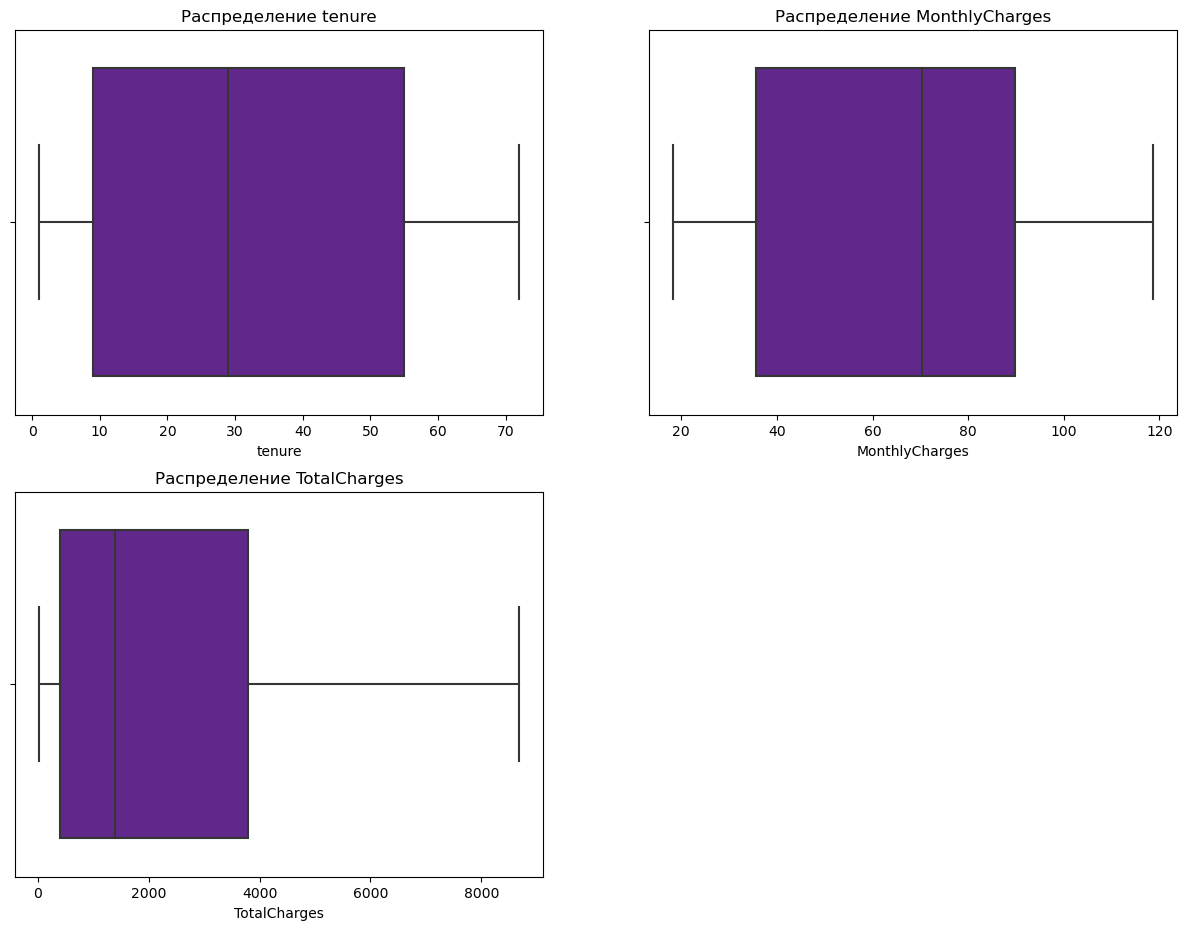

In [9]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
figure = plt.figure(figsize=(15, 17))
for i in features:
    ax = plt.subplot(3, 2, 1 + features.index(i))
    ax = sns.boxplot(x=df[i], palette = colors)
    ax.set_title('Распределение {}'.format(i))

По графикам ящик с усами мы видим, что в данных переменных нет выбросов (нет наблюдений, выходящих за усы). <br><b>Однако что будет, если посмотреть отдельно распределение по классам ушедших и не ушедших клиентов?</b>

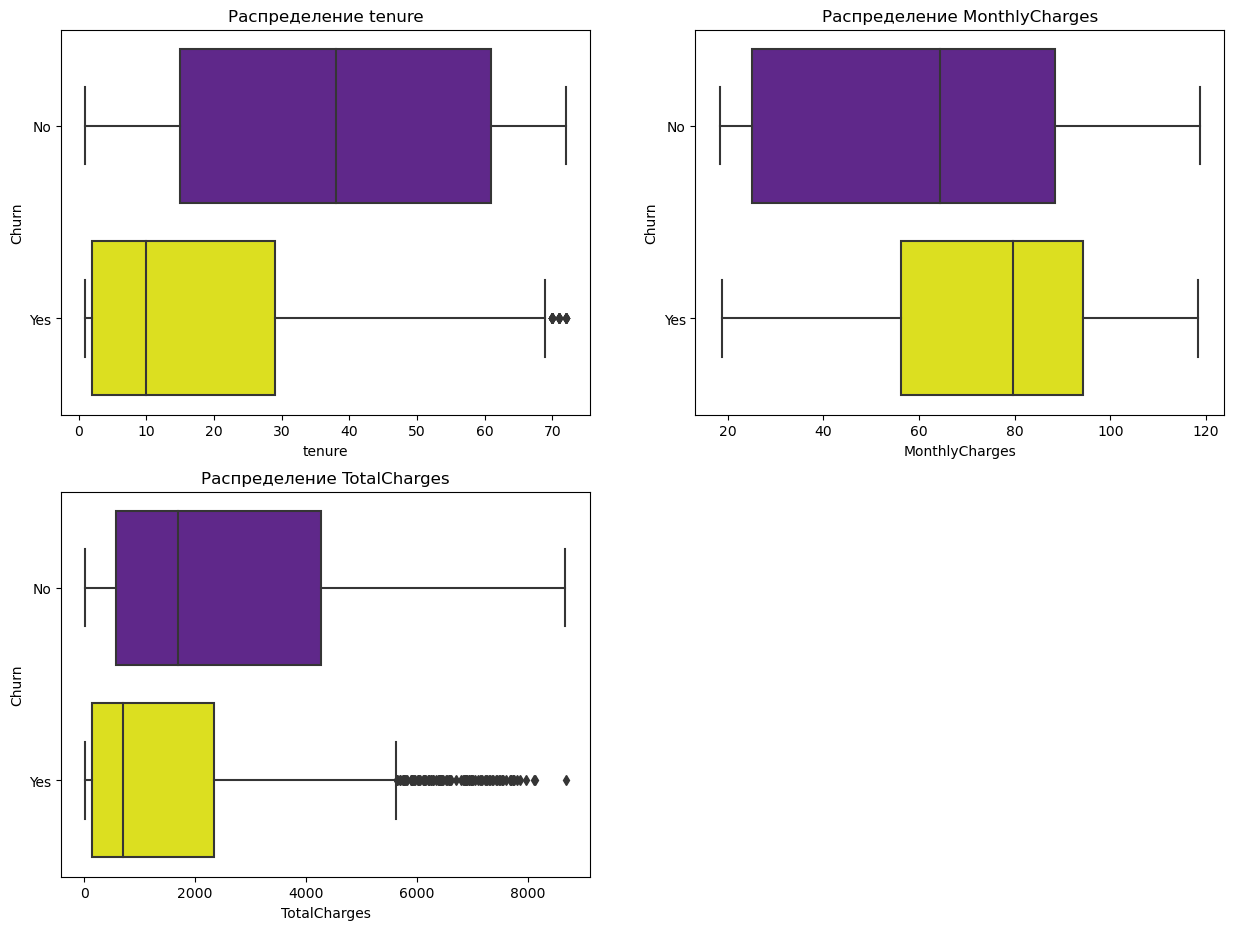

In [10]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
figure = plt.figure(figsize=(15, 17))
for i in features:
    ax = plt.subplot(3, 2, 1 + features.index(i))
    ax = sns.boxplot(x=df[i], y = df['Churn'], palette = colors)
    ax.set_title('Распределение {}'.format(i))

Здесь мы уже видим другую картину, по которой можно сделать несколько выводов:
    <ul>
    <li>Во-первых, распределение данных переменных у ушедших и не ушедших клиентов - различное, на что указывает разная медиана (линия по центру) и межквартильный размах;</li>
    <li>Во-вторых, в классе ушедших клиентов (Churn = Yes) наблюдаются выбросы (правая граница). В tenure - совсем немного, а в TotalCharhes уже значительно больше.</li>
   </ul>

Далее визуализируем распределение данных переменных в классе ушедших клиентов.

In [11]:
df_churned = df[df['Churn']=='Yes'].copy()

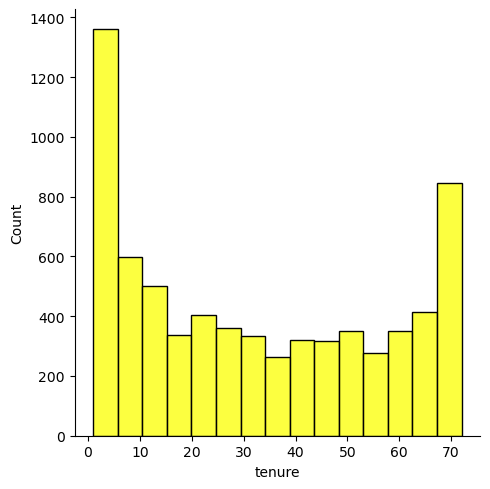

In [12]:
sns.displot(data = df_churned, x = df['tenure'], color = colors[1])

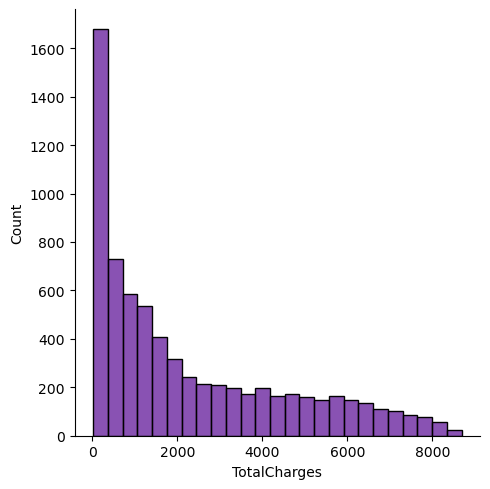

In [13]:
sns.displot(data = df_churned, x = df['TotalCharges'], color = colors[0])

Даже по графикам видно, что распределения далеки от нормального. Попробуем привести данные к нормальному распределению. Будем использовать 2 метода: логарифмирование и квадратный корень.

In [14]:
df_churned['TotalCharges_log'] = np.log1p(df_churned['TotalCharges'])

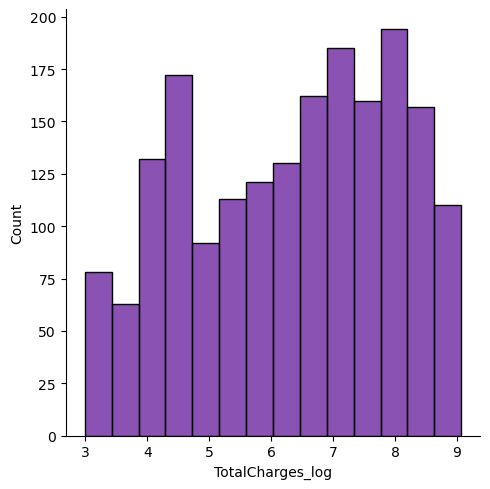

In [15]:
sns.displot(data = df_churned, x = df_churned['TotalCharges_log'], color = colors[0])

In [16]:
df_churned['TotalCharges_sqrt'] = np.sqrt(df_churned['TotalCharges'])

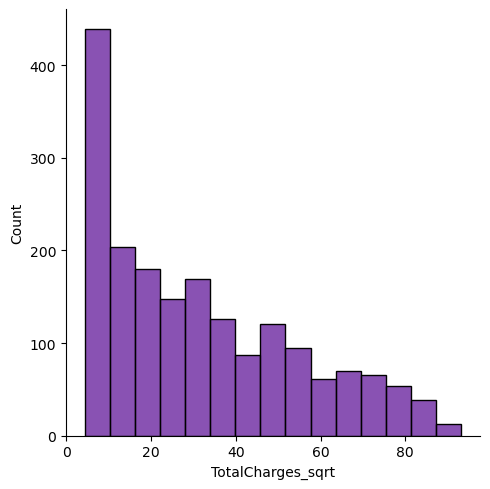

In [17]:
sns.displot(data = df_churned, x = df_churned['TotalCharges_sqrt'], color = colors[0])

In [18]:
df_churned['tenure_log'] = np.log1p(df_churned['tenure'])

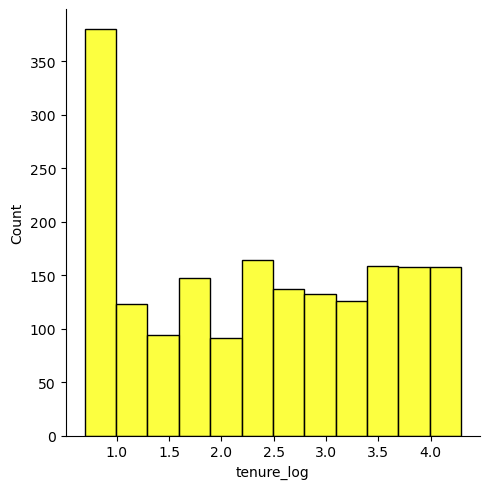

In [19]:
sns.displot(data = df_churned, x = df_churned['tenure_log'], color = colors[1])

In [20]:
df_churned['tenure_sqrt'] = np.sqrt(df_churned['tenure'])

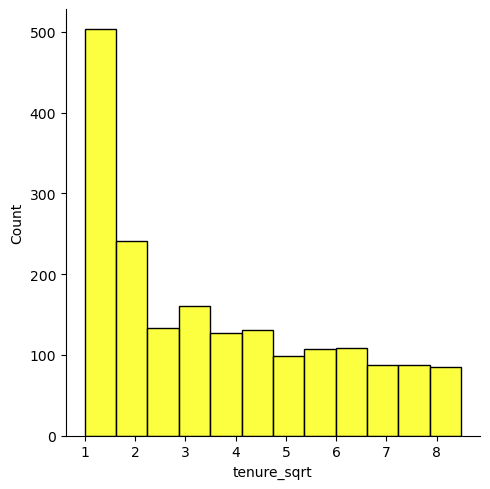

In [21]:
sns.displot(data = df_churned, x = df_churned['tenure_sqrt'], color = colors[1])

По результатам преобразований обоими методами мы видим, что распределение поменялось, но все равно не приводится к нормальному и практически к нему не приближается.

В данном случае даже если распределение не нормальное, на практике все равно допустимо использовать метод 3 сигм:

In [22]:
def find_anomaly(df = df_churned, column = 'tenure'): 
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) & (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [23]:
anomaly = find_anomaly(df = df_churned, column = 'tenure')
anomaly

(76.57250238988308,
 -40.61423593723461,
 Empty DataFrame
 Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, TotalCharges_log, TotalCharges_sqrt, tenure_log, tenure_sqrt]
 Index: []
 
 [0 rows x 25 columns])

In [24]:
upper_level = df_churned['tenure'].mean() + 3 * df_churned['tenure'].std()
lower_level = df_churned['tenure'].mean() - 3 * df_churned['tenure'].std()

In [25]:
upper_level

76.57250238988308

In [26]:
lower_level

-40.61423593723461

Text(0.5, 1.0, '3 sigma')

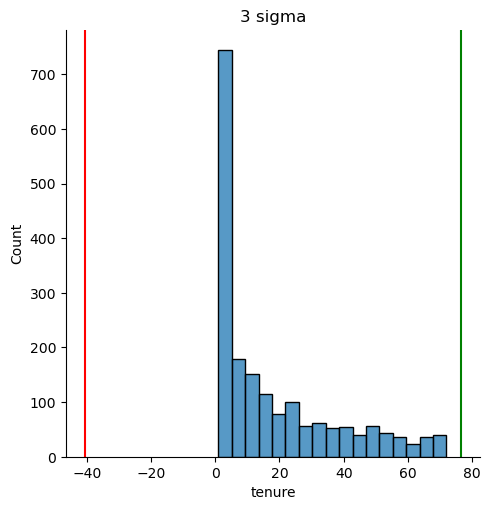

In [27]:
sns. displot (df_churned['tenure'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-')
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-')
plt.title('3 sigma')

Как видим, метод 3 сигм показал, что выбросов в данной переменной нет, хотя на boxplot мы видели 3 точки, выходящие за "усы". Однако подобное расхождение объясняется разными подходами определения выбросов и является допустимым. Проделаем аналогичные действия для расходов.

In [28]:
def find_anomaly(df = df_churned, column = 'TotalCharges'): 
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    anomaly = df[(df[column] > upper_level) & (df[column] < lower_level)]
    return upper_level, lower_level, anomaly

In [29]:
anomaly = find_anomaly(df = df_churned, column = 'TotalCharges')

In [30]:
upper_level = df_churned['TotalCharges'].mean() + 3 * df_churned['TotalCharges'].std()
lower_level = df_churned['TotalCharges'].mean() - 3 * df_churned['TotalCharges'].std()

In [31]:
upper_level

7204.2650775612165

In [32]:
lower_level

-4140.67288922521

Text(0.5, 1.0, '3 sigma')

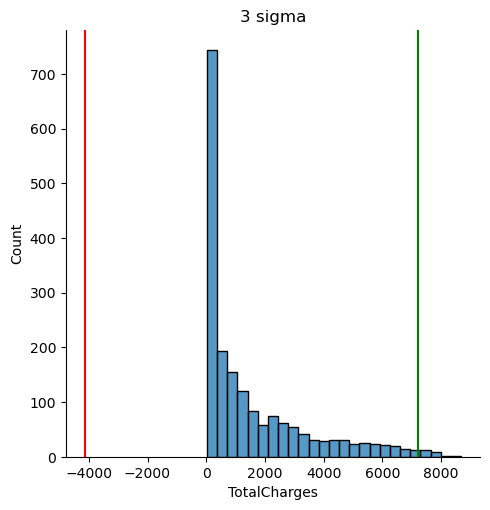

In [33]:
sns. displot (df_churned['TotalCharges'])
plt.axvline(x = anomaly [0], color = 'g', linestyle = '-')
plt.axvline(x = anomaly [1], color = 'r', linestyle = '-')
plt.title('3 sigma')

В данном случае мы уже видим, что выбросы действительно есть. Посмотрим сколько их и примем решение об удалении из массива.

In [34]:
df_churned['Anomaly_big'] = np.where(df_churned['TotalCharges'] > anomaly[0], 1, 0)
df_churned[df_churned['Anomaly_big'] == 1]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
104   3192-NQECA    Male              0     Yes         No      68   
809   4853-RULSV    Male              0      No         No      70   
972   2834-JRTUA    Male              0      No         No      71   
1302  0201-OAMXR  Female              0      No         No      70   
2199  2659-VXMWZ    Male              0     Yes        Yes      67   
2282  5440-FLBQG    Male              1     Yes         No      69   
3035  7317-GGVPB    Male              0     Yes         No      71   
3106  8809-RIHDD    Male              0     Yes        Yes      72   
3433  0917-EZOLA    Male              1     Yes         No      72   
3511  0748-RDGGM    Male              0     Yes         No      70   
3883  3886-CERTZ  Female              0     Yes         No      72   
4387  5502-RLUYV  Female              0     Yes        Yes      69   
4602  2889-FPWRM    Male              0     Yes         No      72   
4676  6305-YLBMM    Male              0      No         No      69   
5119  8199-ZLLSA    Male              0      No         No      67   
5249  8634-CILSZ    Male              0      No         No      69   
5572  5271-YNWVR    Male              0     Yes        Yes      68   
5688  1984-FCOWB  Female              0     Yes         No      70   
5693  5287-QWLKY    Male              1     Yes        Yes      71   
6023  9090-SGQXL    Male              1     Yes         No      68   
6026  9835-ZIITK    Male              1     Yes         No      66   
6029  1555-DJEQW  Female              0     Yes        Yes      70   
6280  9053-JZFKV    Male              0      No         No      67   
6389  3259-FDWOY    Male              0     Yes        Yes      71   
6399  5748-RNCJT    Male              0      No         No      69   
6528  1444-VVSGW    Male              0     Yes         No      70   
6596  7632-MNYOY    Male              1      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
104           Yes           Yes     Fiber optic             No  ...   
809           Yes           Yes     Fiber optic            Yes  ...   
972           Yes           Yes     Fiber optic            Yes  ...   
1302          Yes           Yes     Fiber optic            Yes  ...   
2199          Yes           Yes     Fiber optic            Yes  ...   
2282          Yes           Yes     Fiber optic             No  ...   
3035          Yes           Yes     Fiber optic             No  ...   
3106          Yes           Yes     Fiber optic             No  ...   
3433          Yes           Yes     Fiber optic             No  ...   
3511          Yes            No     Fiber optic            Yes  ...   
3883          Yes           Yes     Fiber optic             No  ...   
4387          Yes           Yes     Fiber optic             No  ...   
4602          Yes           Yes     Fiber optic            Yes  ...   
4676          Yes            No     Fiber optic             No  ...   
5119          Yes           Yes     Fiber optic            Yes  ...   
5249          Yes           Yes     Fiber optic             No  ...   
5572          Yes           Yes     Fiber optic            Yes  ...   
5688          Yes           Yes     Fiber optic             No  ...   
5693          Yes           Yes     Fiber optic            Yes  ...   
6023          Yes           Yes     Fiber optic             No  ...   
6026          Yes           Yes     Fiber optic             No  ...   
6029          Yes           Yes     Fiber optic            Yes  ...   
6280          Yes           Yes     Fiber optic            Yes  ...   
6389          Yes           Yes     Fiber optic             No  ...   
6399          Yes           Yes     Fiber optic             No  ...   
6528          Yes           Yes     Fiber optic            Yes  ...   
6596          Yes           Yes     Fiber optic             No  ...   

     PaperlessBilling              PaymentMethod Monthly

Получили 27 выбросов - это немного, поэтому можем удалить данные строки. Важно отметить, что мы работали с копией массива (ушедшие клиенты), а строки необходимо удалить из исходного датафрейма. Для этого будем использовать мердж.

In [35]:
df_to_delete = df_churned[df_churned['Anomaly_big'] == 1]

In [36]:
df_to_delete.shape

(27, 26)

In [37]:
df_churned.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
2   3668-QPYBK    Male              0      No         No       2          Yes   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   

   MultipleLines InternetService OnlineSecurity  ... PaperlessBilling  \
2             No             DSL            Yes  ...              Yes   
4             No     Fiber optic             No  ...              Yes   
5            Yes     Fiber optic             No  ...              Yes   
8            Yes     Fiber optic             No  ...              Yes   
13           Yes     Fiber optic             No  ...              Yes   

                PaymentMethod MonthlyCharges TotalCharges Churn  \
2                Mailed check          53.85       108.15   Yes   
4            Electronic check          70.70       151.65   Yes   
5            Electronic check          99.65       820.50   Yes   
8            Electronic check         104.80      3046.05   Yes   
13  Bank transfer (automatic)         103.70      5036.30   Yes   

   TotalCharges_log TotalCharges_sqrt tenure_log  tenure_sqrt  Anomaly_big  
2          4.692723         10.399519   1.098612     1.414214            0  
4          5.028148         12.314625   1.098612     1.414214            0  
5          6.711132         28.644371   2.197225     2.828427            0  
8          8.021929         55.191032   3.367296     5.291503            0  
13         8.524626         70.966894   3.912023     7.000000            0  

[5 rows x 26 columns]

In [38]:
df_churned.drop(columns=['TotalCharges_log', 'TotalCharges_sqrt', 'tenure_log', 'tenure_sqrt'])

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2     3668-QPYBK    Male              0      No         No       2   
4     9237-HQITU  Female              0      No         No       2   
5     9305-CDSKC  Female              0      No         No       8   
8     7892-POOKP  Female              0     Yes         No      28   
13    0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7010  1699-HPSBG    Male              0      No         No      12   
7015  8775-CEBBJ  Female              0      No         No       9   
7021  6894-LFHLY    Male              1      No         No       1   
7023  0639-TSIQW  Female              0      No         No      67   
7030  8361-LTMKD    Male              1     Yes         No       4   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
2             Yes            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
5             Yes           Yes     Fiber optic             No  ...   
8             Yes           Yes     Fiber optic             No  ...   
13            Yes           Yes     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7010          Yes            No             DSL             No  ...   
7015          Yes            No             DSL             No  ...   
7021          Yes           Yes     Fiber optic             No  ...   
7023          Yes           Yes     Fiber optic            Yes  ...   
7030          Yes           Yes     Fiber optic             No  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2             No          No              No  Month-to-month              Yes   
4             No          No              No  Month-to-month              Yes   
5             No         Yes             Yes  Month-to-month              Yes   
8            Yes         Yes             Yes  Month-to-month              Yes   
13            No         Yes             Yes  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7010         Yes         Yes              No        One year              Yes   
7015          No          No              No  Month-to-month              Yes   
7021          No          No              No  Month-to-month              Yes   
7023          No         Yes              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
2                  Mailed check          53.85       108.15    Yes   
4              Electronic check          70.70       151.65    Yes   
5              Electronic check          99.65       820.50    Yes   
8              Electronic check         104.80      3046.05    Yes   
13    Bank transfer (automatic)         103.70      5036.30    Yes   
...                         ...            ...          ...    ...   
7010           Electronic check          59.80       727.80    Yes   
7015  Bank transfer (automatic)          44.20       403.35    Yes   
7021           Electronic check          75.75        75.75    Yes   
7023    Credit card (automatic)         102.95      6886.25    Yes   
7030               Mailed check          74.40       306.60    Yes   

      Anomaly_big  
2               0  
4               0  
5               0  
8               0  
13              0  
...           ...  
7010            0  
7015            0  
7021            0  
7023            0  
7030            0  

[1869 rows x 22 columns]

In [39]:
df2 = df.merge(df_to_delete.customerID, 
                   how='left', indicator=True)
df2

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn     _merge  
0              Electronic check          29.85        29.85     No  left_only  
1                  Mailed check          56.95      1889.50     No  left_only  
2                  Mailed check          53.85       108.15    Yes  left_only  
3     Bank transfer (automatic)          42.30      1840.75     No  left_only  
4              Electronic check          70.70       151.65    Yes  left_only  
...                         ...            ...          ...    ...        ...  
7027               Mailed check          84.80      1990.50     No  left_only  
7028    Credit card (automatic)         103.20      7362.90     No  left_only  
7029           Electronic check          29.60       346.45     No  left_only  
7030               Mailed check          74.40       306.60    Yes  left_only  
7031  Bank transfer (automatic)         105.65      6844.50     No  left_only  

[7032 rows x 22 columns]

In [40]:
df2 = df2.loc[df2._merge=='left_only',df2.columns!='_merge']
df2.shape

(7005, 21)

In [41]:
df2.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

Получили новый массив df2 с очищенными выбросами по переменной итоговых расходов.<br>

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>5. ДЕТАЛЬНОЕ ИЗУЧЕНИЕ ВЗАИМОСВЯЗЕЙ</b></font>
    </div>


Для начала посмотрим на признаки, принимающие только 2 уникальных значения:

In [42]:
df2.gender.value_counts()

Male      3527
Female    3478
Name: gender, dtype: int64

In [43]:
df2.SeniorCitizen.value_counts()

0    5869
1    1136
Name: SeniorCitizen, dtype: int64

In [44]:
df2.Partner.value_counts()

No     3630
Yes    3375
Name: Partner, dtype: int64

Перекодируем переменную в бинарный вид.

In [45]:
df2['Partner'] = df2['Partner'].apply(lambda x: 1 if x == 'Yes' else 0)

Проверим:

In [46]:
df2.Partner.value_counts()

0    3630
1    3375
Name: Partner, dtype: int64

In [47]:
df2.Dependents.value_counts()

No     4913
Yes    2092
Name: Dependents, dtype: int64

Аналогично перекодируем переменную в бинарный вид.

In [48]:
df2['Dependents'] = df2['Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)

In [49]:
df2.PhoneService.value_counts()

Yes    6325
No      680
Name: PhoneService, dtype: int64

In [50]:
df2['PhoneService'] = df2['PhoneService'].apply(lambda x: 1 if x == 'Yes' else 0)

In [51]:
df2.PaperlessBilling.value_counts()

Yes    4145
No     2860
Name: PaperlessBilling, dtype: int64

In [52]:
df2['PaperlessBilling'] = df2['PaperlessBilling'].apply(lambda x: 1 if x == 'Yes' else 0)

In [53]:
df2.Churn.value_counts()

No     5163
Yes    1842
Name: Churn, dtype: int64

In [54]:
df2['Churn'] = df2['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [55]:
df2.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95       1889.50   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

Теперь можем посмотреть на корреляционную матрицу числовых признаков и изучить взаимосвязи с целевой переменной:

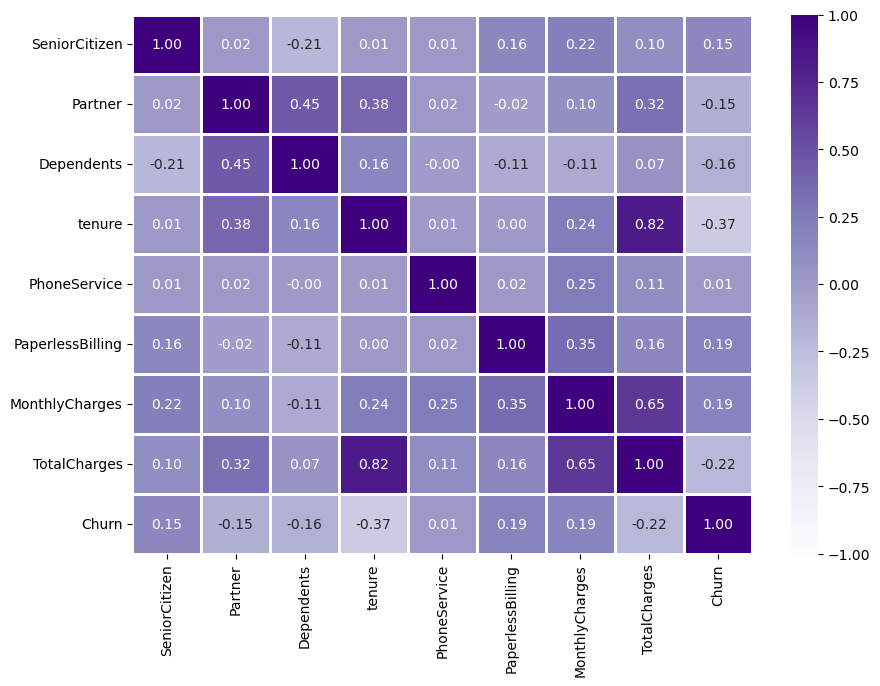

In [56]:
corr_m = df2.corr()

fig = plt.figure(figsize=(10, 7))
corr_m = sns.heatmap(corr_m, annot=True,
                 linecolor = 'white',
                 linewidth = 1,
                 cmap = 'Purples',
                 vmin=-1., 
                 vmax=1.,
                 fmt=".2f",
                 )

К сожалению, мы видим, что у целевой переменной Churn отсутствует тесная взаимосвязь с числовыми признаками. Наибольшая отрицательная корреляция наблюдается с переменной tenure - кол-во месяцев клиента в компании, но даже эта связь довольно слабая.

Однако, мы видим тесную взаимосвязь между признаками tenure и TotalCharges (0.82), посмотрим на интерактивном графике данную зависимость:

In [57]:
px.scatter(df2, x = 'tenure', y = 'TotalCharges', color = 'Churn')

Действительно - полученная зависимость логична - чем дольше клиент пользуется услугами компании, тем больше итоговых расходов за все время у него будет.

Далее рассмотрим распределение данных величин в зависимости от призназа оттока Churn:

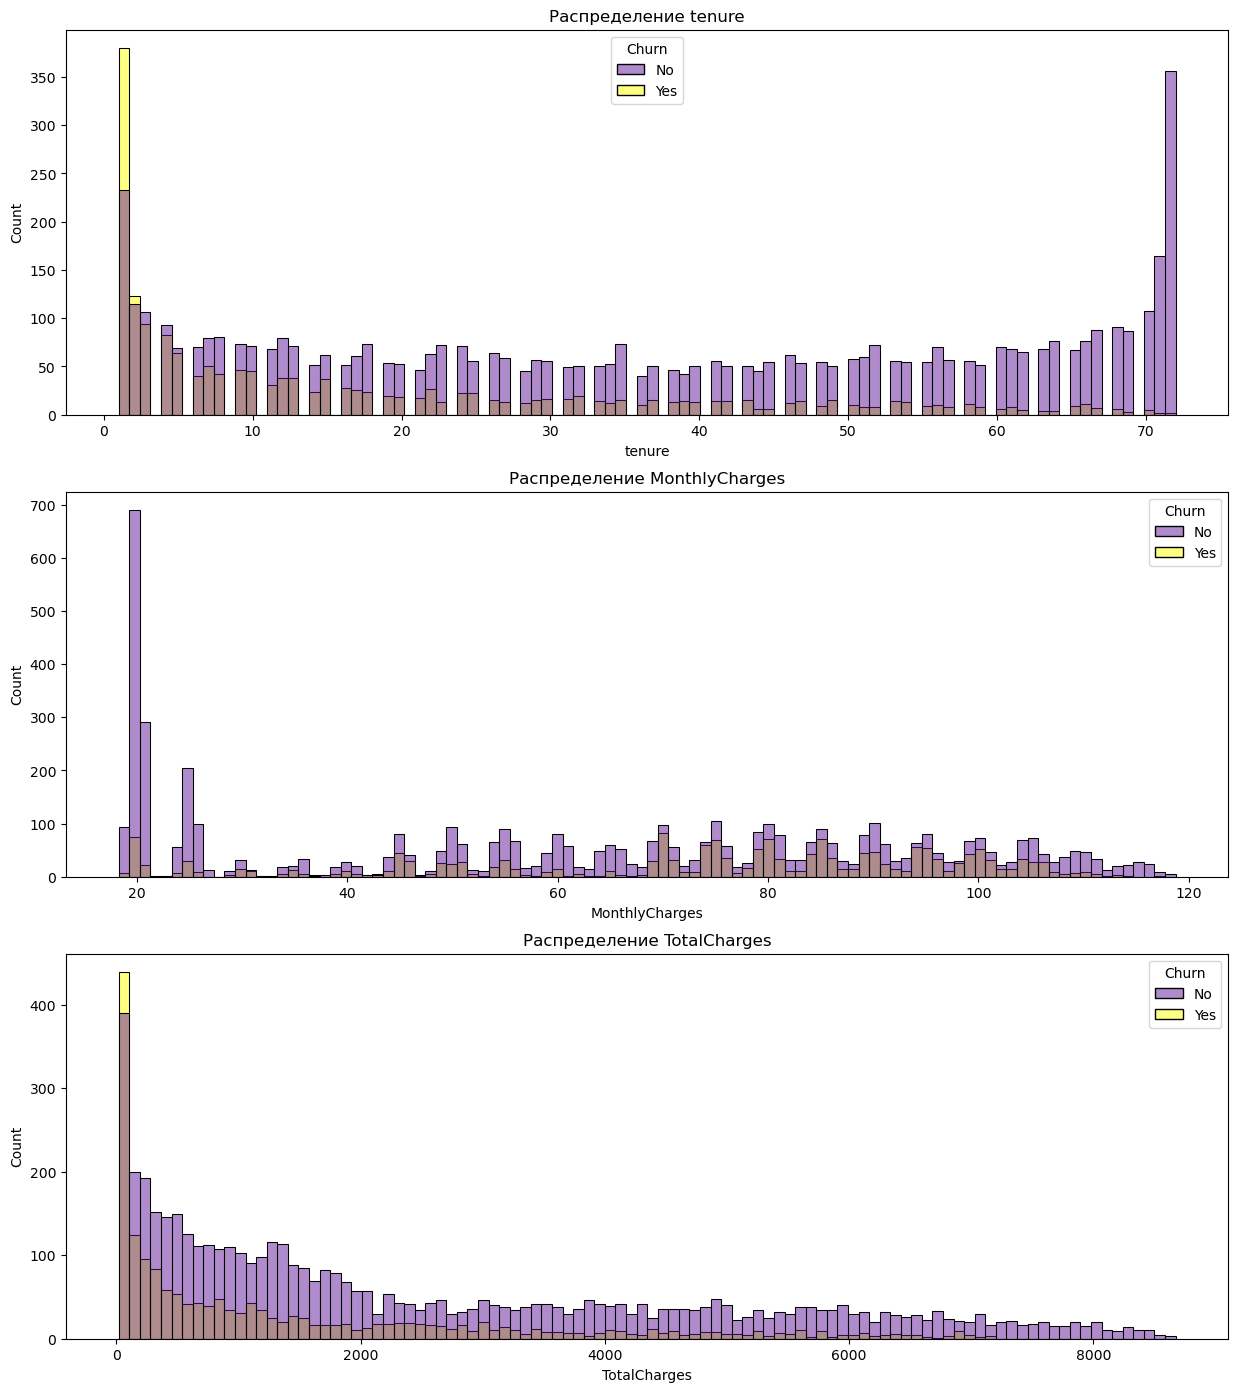

In [58]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
figure = plt.figure(figsize=(15, 17))
for i in features:
    ax = plt.subplot(3, 1, 1 + features.index(i))
    ax = sns.histplot(x=df2[i], bins = 100, ax=ax, palette = colors, hue = df['Churn'])
    ax.set_title('Распределение {}'.format(i))

Первый график - <em>распределение кол-ва клиентов в зависимости от кол-ва месяцев пользования услугами компании и признака оттока</em> дает нам важный инсайт: <br>
Клиенты, ушедшие из компании, в основном делают это в первый месяц (оранжевый левый крайний столбец). И также значительное число лояльных клиентов взаимодействуют с компанией уже почти 6 лет (крайний правый столбец). Хотя и корреляционный анализ показал нам, что взаимосвязь отсутствует, однако крайние значения могут быть нам полезны для целей прогнозирования оттока с помощью машинного обучения. <br><br>

Второй и третий график отражают примерно похожие распределения расходов для ушедших и не ушедших клиентов, различающиеся в основном только в кол-ве клиентов, принадлежащих данным классам.<br><br>
Действительно, убедимся, что доля не ушедших клиентов выше:

<AxesSubplot:title={'center':'Доля ушедших и не ушедших клиентов'}, ylabel='Churn'>

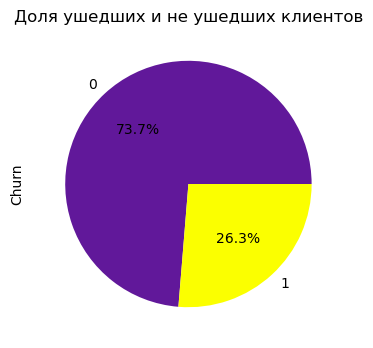

In [59]:
df2['Churn'].value_counts().plot(kind='pie', figsize = (7,4), colors = colors,
                                                   title = 'Доля ушедших и не ушедших клиентов', 
                                                   autopct = '%.1f%%')

74% клиентов пользуются услугами компании, а 26% - отказались.

Далее рассмотрим пропорцию всех переменных, относящихся к личным характеристикам клиента:

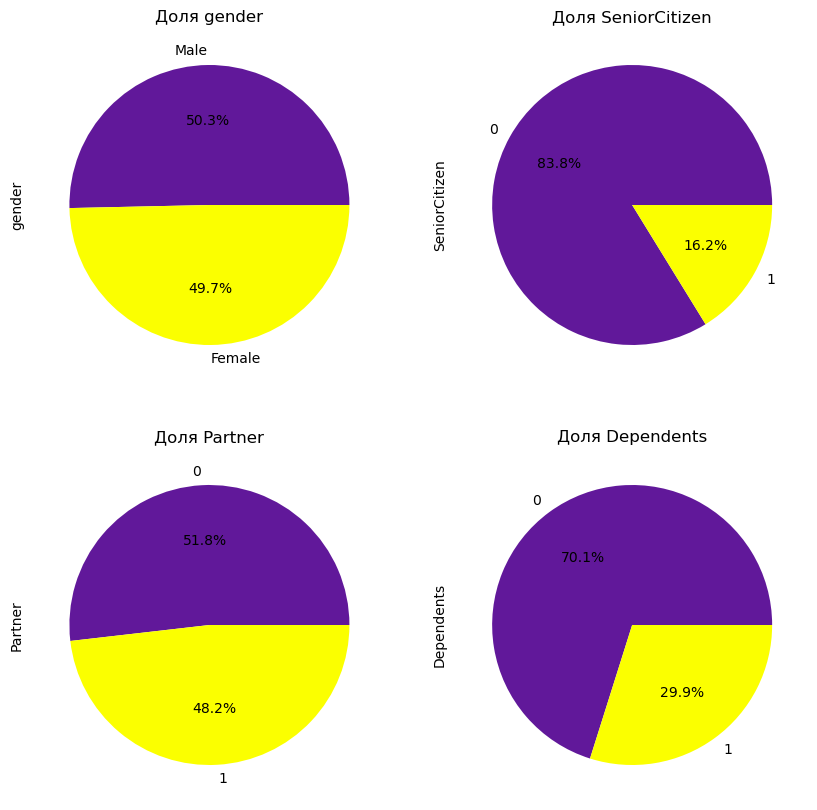

In [60]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
figure = plt.figure(figsize=(10, 10))
for i in features:
    ax = plt.subplot(2, 2, 1 + features.index(i))
    ax = df2[i].value_counts().plot(kind='pie', colors = colors,autopct = '%.1f%%')
    ax.set_title('Доля {}'.format(i))

<ul>
    <li>Пропорция мужчин и женщин практически равная;</li>
    <li>16% клиентов являются пожилыми;</li>
    <li>Доля клиентов, у которых есть партнер (состоят в отношениях) незначительно выше (52% против 48%);</li>
    <li>У 70% клиентов нет детей/иждивенцев.</li>
   </ul>

Далее изучим взаимосвязи данных переменных с целевой:

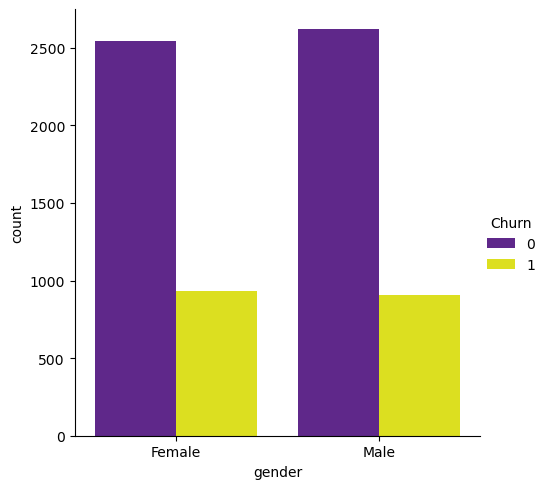

In [61]:
sns.catplot(x="gender", hue='Churn', kind="count", data=df2, palette=colors)
plt.show()

Количество ушедших и не ушедших клиентов практически не различается в зависимости от пола. Вероятнее всего, пол не будет оказывать существенное влияние на вероятность оттока.

In [62]:
df2.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).to_frame()

Churn
SeniorCitizen Churn          
0             0      0.766229
              1      0.233771
1             0      0.586268
              1      0.413732

<AxesSubplot:ylabel='SeniorCitizen'>

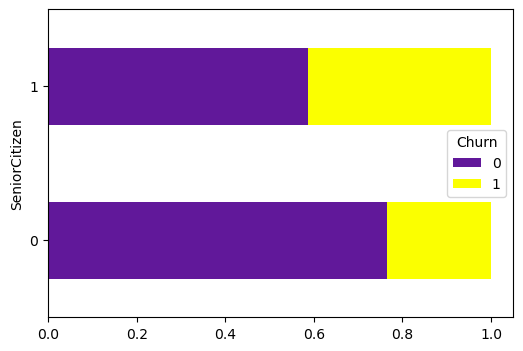

In [63]:
df2.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack('Churn').plot.barh(stacked=True,figsize=(6,4), color = colors)

Среди пожилых клиентов (SeniorCitizen = 1) доля ушедших выше, чем среди более молодых клиентов. Так, 41% пожилых клиентов - ушедших, в то время как среди не пожилых доля составляет 23%.

<AxesSubplot:ylabel='Partner'>

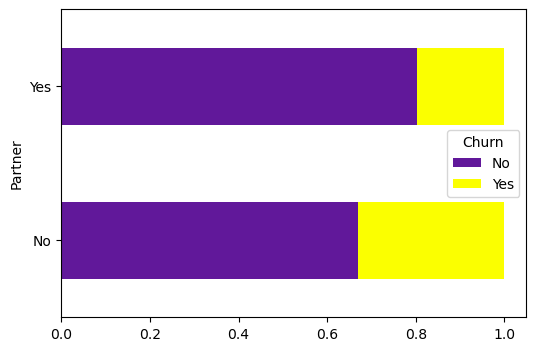

In [64]:
df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack('Churn').plot.barh(stacked=True,figsize=(6,4), color = colors)

Среди клиентов, имеющих партнера, доля ушедших ниже, чем среди "свободных".

<AxesSubplot:xlabel='Dependents'>

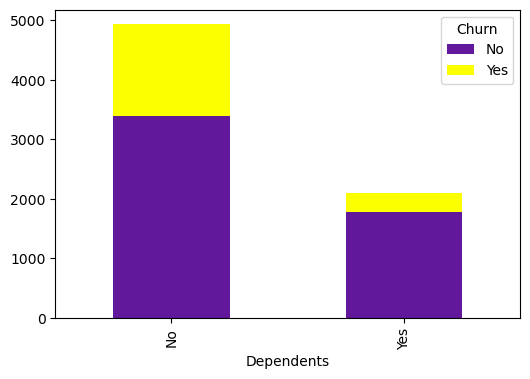

In [65]:
df.groupby('Dependents')['Churn'].value_counts().unstack('Churn').plot.bar(stacked=True,figsize=(6,4), color = colors)

А среди клиентов, не имеющих иждиценцев (т.е. детей в большинстве случаев), доля ушедших выше, чем среди неимеющих.

Перейдем к анализ признаков, характеризующих комплекс услуг клиента.

In [66]:
service_features = ['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

In [67]:
df2[service_features]

PhoneService     MultipleLines InternetService OnlineSecurity  \
0                0  No phone service             DSL             No   
1                1                No             DSL            Yes   
2                1                No             DSL            Yes   
3                0  No phone service             DSL            Yes   
4                1                No     Fiber optic             No   
...            ...               ...             ...            ...   
7027             1               Yes             DSL            Yes   
7028             1               Yes     Fiber optic             No   
7029             0  No phone service             DSL            Yes   
7030             1               Yes     Fiber optic             No   
7031             1                No     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0             Yes               No          No          No              No   
1              No              Yes          No          No              No   
2             Yes               No          No          No              No   
3              No              Yes         Yes          No              No   
4              No               No          No          No              No   
...           ...              ...         ...         ...             ...   
7027           No              Yes         Yes         Yes             Yes   
7028          Yes              Yes          No         Yes             Yes   
7029           No               No          No          No              No   
7030           No               No          No          No              No   
7031           No              Yes         Yes         Yes             Yes   

            Contract  
0     Month-to-month  
1           One year  
2     Month-to-month  
3           One year  
4     Month-to-month  
...              ...  
7027        One year  
7028        One year  
7029  Month-to-month  
7030  Month-to-month  
7031        Two year  

[7005 rows x 10 columns]

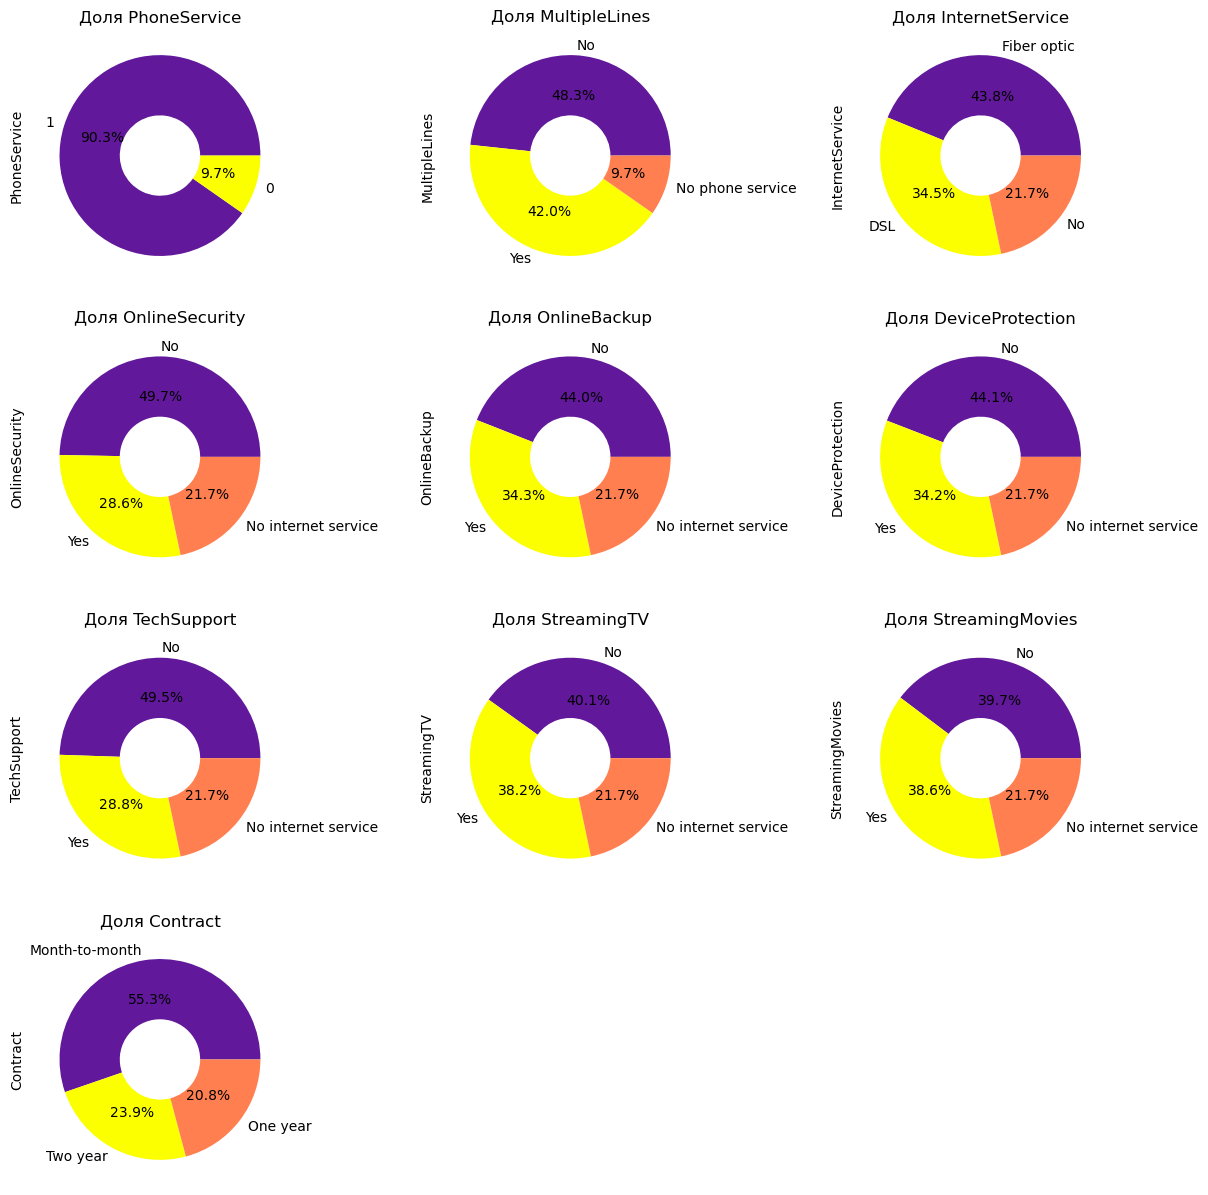

In [68]:
colors = ['#61189A', '#FBFF00','#FF7F50']
figure = plt.figure(figsize=(15, 15))
for i in service_features:
    ax = plt.subplot(4, 3, 1 + service_features.index(i))
    ax = df2[i].value_counts().plot(kind='pie', colors = colors,autopct = '%.1f%%', wedgeprops=dict(width=0.6))
    ax.set_title('Доля {}'.format(i))

<ul>
    <li>У большинства клиентов подключено телефонное обслуживание (90%);</li>
    <li>У более половины клиентов из подключивших обслуживание, подключена также функция нескольких телефонных линий;</li>
    <li>А вот доля клиентов, имеющих интернет провайдера уже ниже - 78%;</li>
    <li>Также у большей части клиентов не подключены доп. сервисы: онлайн-безопасности, резервного копирования, защиты устройства, тех.поддержка;</li>
    <li>Но примечательно, что из всех доп. услуг наибольшая доля подключивших среди развлекательных услуг - ТВ (38%) и фильмы (39%)</li>
    <li>У 55% клиентов ежемесячная подписка, у 21% годовой контракт, 24% - 2-ух годовой контракт. Можно выдвинуть гипотезу о том, что у клиентов с ежемесячной подпиской отток будет выше (проверим далее).</li>
   </ul>

Интресно, как эти данные взаимосвязаны с целевой переменной?

In [69]:
service_features = ['PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']

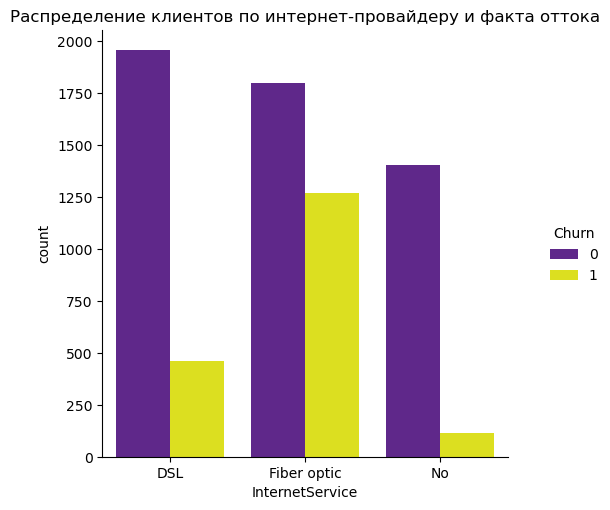

In [70]:
sns.catplot(x="InternetService", hue='Churn', kind="count", data=df2, palette=colors).set(title='Распределение клиентов по интернет-провайдеру и факта оттока')

Довольно интересно, что среди тех, кто не имеет интернет провайдера, доля ушедших клиентов очень низкая в пропорции к неушедшим. По DSL-провайдеру пропорция немного выше. А вот по Fiber optic высокий % оттока, что вероятно, может иметь влияние на прогноз оттока.

<AxesSubplot:ylabel='Contract'>

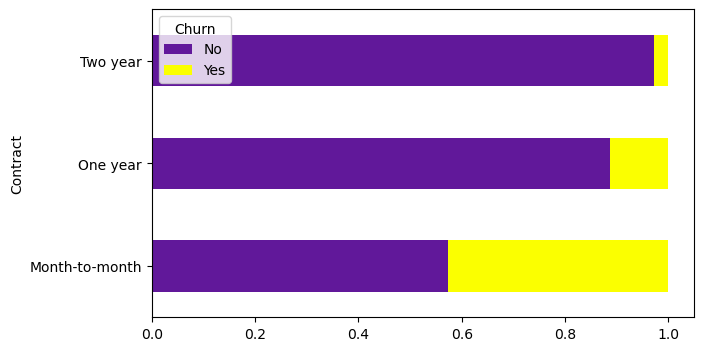

In [71]:
df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack('Churn').plot.barh(stacked=True,figsize=(7,4), color = colors)

Действительно, гипотеза подтвердилась: у сегмента клиентов с ежемесячной подпиской выше % оттока. Наиболее низкий отток наблюдается среди клиентов с 2 годовым контрактом.

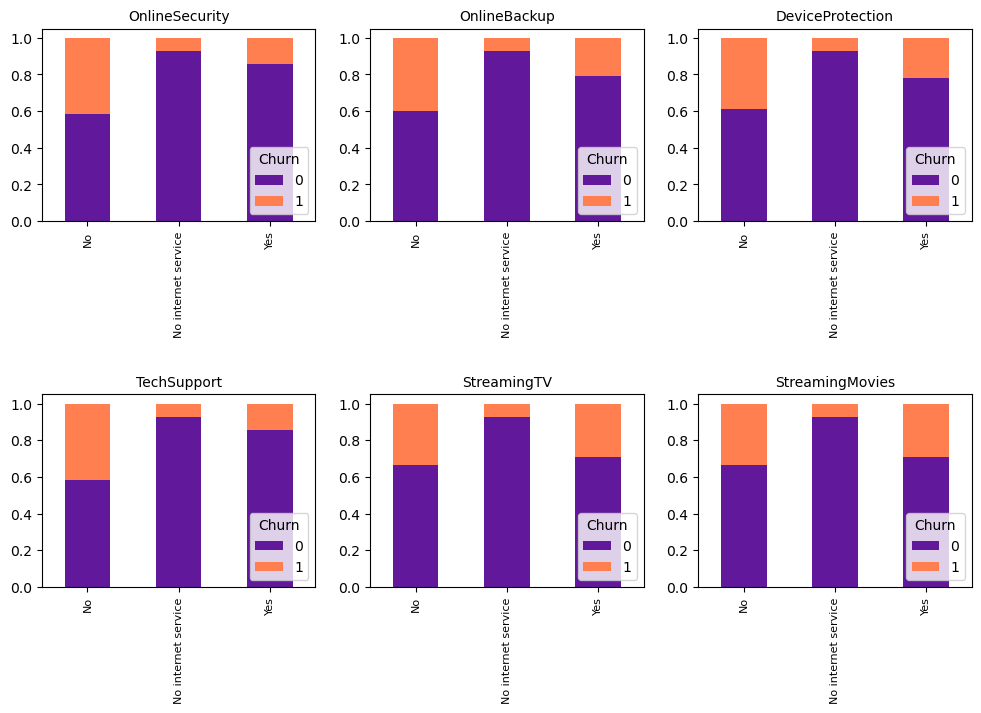

In [72]:
colors = ['#61189A', '#FF7F50']
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(hspace=0.9)

for i in service_features[3:9]:
    cross_tab = pd.crosstab(index=df2[i],columns=df2['Churn'], normalize="index")    
    ax = plt.subplot(3,3, 1 + service_features.index(i))
    cross_tab.plot(kind='bar', stacked=True, ax = ax, color = colors).set(xlabel=None)
    plt.legend(title = "Churn", loc=4)
    ax.tick_params(axis='x', labelsize=8)
    ax.set_title(i, fontsize = 10)
    

<b>Крайне интересный инсайт:</b> у клиентов, у которых есть интернет провайдер, но не подключены доп. услуги, % оттока выше чем у тех, у кого услуга подключена или нет интернет-провайдера вовсе. <br>Это наблюдается для всех услуг, кроме развлекательных (ТВ и фильмы). Действительно, для остальных услуг (онлайн-безопасность, резервеное копирование и тд), % оттока клиентов составляет около 40.

PaperlessBilling - подключено ли у клиента безбумажное выставление счетов
PaymentMethod - способ оплаты

Изучив взаимосвязи между признаками перейдем к постановке и проверке гипотез. 

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>6. ПРОВЕРКА ГИПОТЕЗ</b></font>
    </div>


1. Проверим первую гипотезу о том, что общие расходы клиентов различаются в зависимости от пола.

<b>H0: разницы между суммами расходов женщин и мужчин нет<br>
H1: существует статистически значимая разница в объеме расходов женщин и мужчин.</b>

In [73]:
df_female = df2[df2['gender'] == 'Female']['TotalCharges']

<AxesSubplot:>

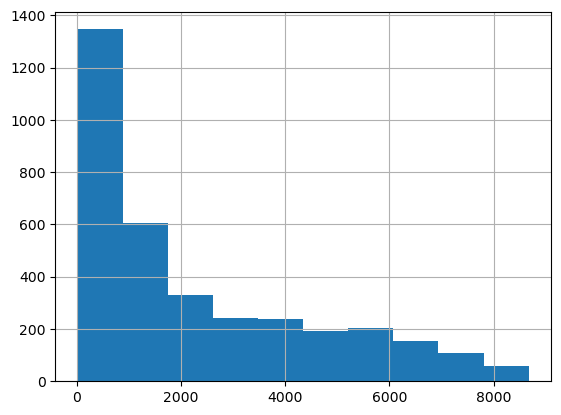

In [74]:
df_female.hist()

In [75]:
df_male = df2[df2['gender'] == 'Male']['TotalCharges']

<AxesSubplot:>

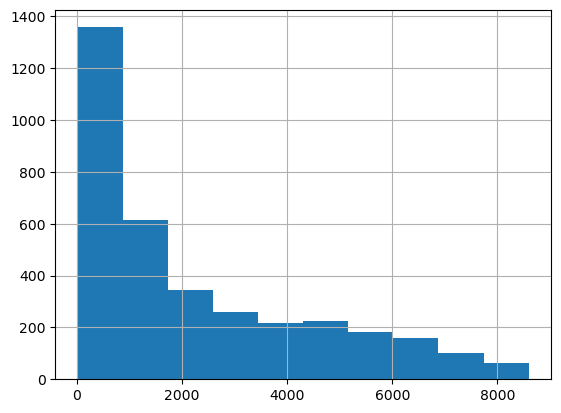

In [76]:
df_male.hist()

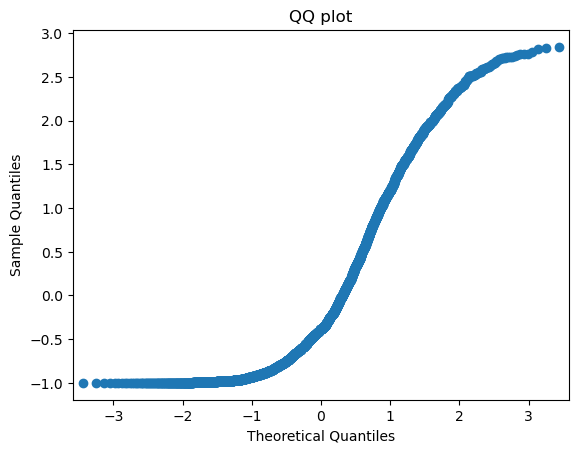

In [77]:
sm.qqplot(df_male, fit = True)
plt.title('QQ plot')
plt.show()  

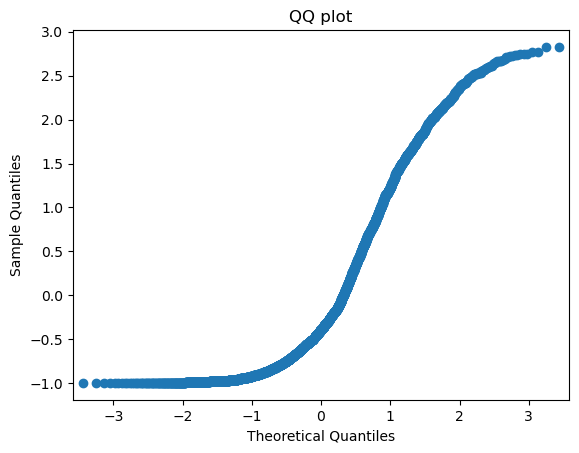

In [78]:
sm.qqplot(df_female, fit = True)
plt.title('QQ plot')
plt.show()  

Как видно по графикам выше, распределение расходов мужчин и женщин не нормальное. Попробуем привести их к нормальному:

In [79]:
df_male_log = np.log(df_male)

<AxesSubplot:>

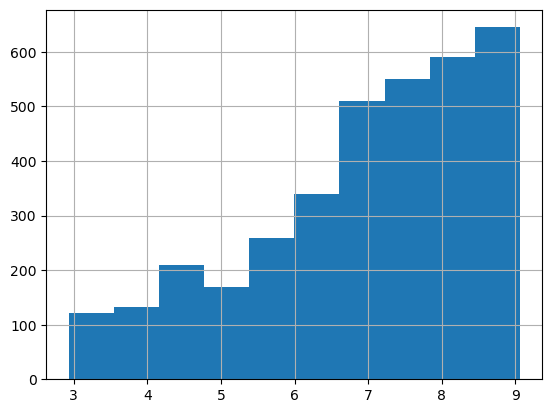

In [80]:
df_male_log.hist()

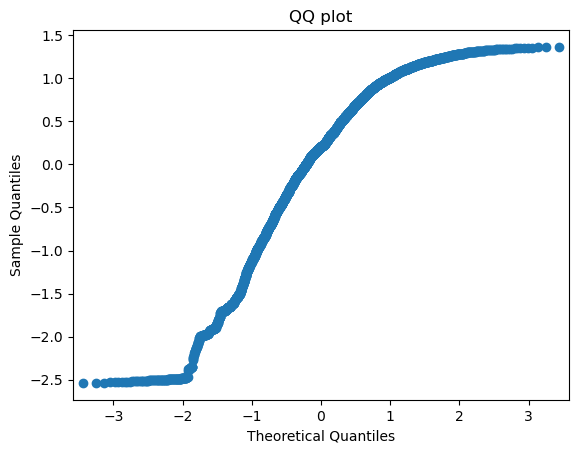

In [81]:
sm.qqplot(df_male_log, fit = True)
plt.title('QQ plot')
plt.show()  

In [82]:
df_male_sqrt = np.sqrt(df_male)

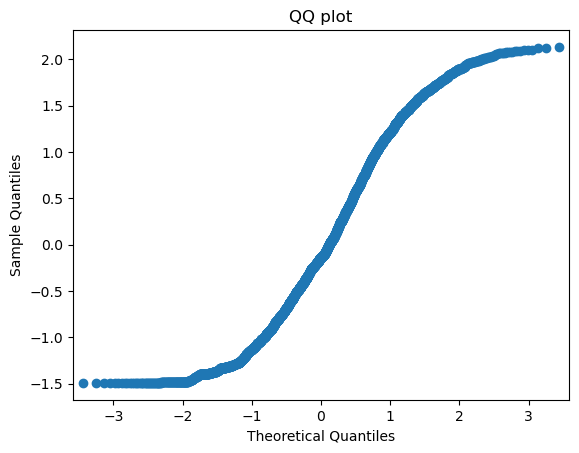

In [83]:
sm.qqplot(df_male_sqrt, fit = True)
plt.title('QQ plot')
plt.show()  

Как видно, у нас не получается даже близко привести распределение к нормальному. В таком случае для проверки гипотезы мы будем использовать непараметрический критерий Манна-Уитни, у которого нет ограничений на распределение (но удовлетворяется условие о независимости выборок - мужчины и женщины).

In [84]:
stats.mannwhitneyu(df_male, df_female)

MannwhitneyuResult(statistic=6097192.0, pvalue=0.6683079562737138)

In [85]:
MU_pval = stats.mannwhitneyu(df_male, df_female)[1]

In [86]:
alpha = 0.5

In [87]:
if MU_pval < alpha:
    print("Вывод: отвергаем H0 (связь есть)")
else:
    print("Вывод: не отвергаем H0 (связи нет или стат. не значима)")
    

Вывод: не отвергаем H0 (связи нет или стат. не значима)


<b>Таким образом мы получаем, что статистически значимой разницы между суммами расходов женщин и мужчин нет.</b>

2. А равна ли доля мужчин и женщин среди ушедших и не ушедших клиентов?

In [88]:
t_gender_churn = df2.groupby('gender')['Churn'].value_counts().unstack()
t_gender_churn

Churn      0    1
gender           
Female  2544  934
Male    2619  908

Поскольку проверка даннной гипотезы касается категориальных переменных, будем использовать непараметрический критерий хи-квадрат.

In [89]:
hi2 = scipy.stats.chi2_contingency(t_gender_churn, correction = False)
hi2

(1.1137745805673027,
 0.2912629078750648,
 1,
 array([[2563.44239829,  914.55760171],
        [2599.55760171,  927.44239829]]))

In [90]:
critical_value = scipy.stats.chi2.ppf(0.95, 2)
critical_value

5.991464547107979

In [91]:
if hi2[0] > critical_value:
    print("Вывод: отвергаем H0 (связь есть)")
else:
    print("Вывод: не отвергаем H0 (связи нет или стат. не значима)")
    

Вывод: не отвергаем H0 (связи нет или стат. не значима)


<b>Интересный вывод получили: </b>различие в доле мужчин и женщин среди ушедших и не ушедших клиентов статистически незначимо. Это значит, что мы можем не использовать признак пола при прогнозировании оттока.

3. Теперь рассмотрим гипотезу от том, есть ли зависимость между сроком контракта и целевой переменной оттока.

<b>H0: Зависимости между сроком контракта и оттоком нет<br>
H1: Зависимость между сроком контракта и оттоком есть</b>

Для проверки гипотезы посторим таблицу сопряженности:

In [92]:
t_contract_churn = df2.groupby('Contract')['Churn'].value_counts().unstack()
t_contract_churn

Churn              0     1
Contract                  
Month-to-month  2220  1652
One year        1306   154
Two year        1637    36

In [93]:
hi2 = scipy.stats.chi2_contingency(t_contract_churn, correction = False)
hi2

(1225.3562223801505,
 8.265652200863327e-267,
 2,
 array([[2853.83811563, 1018.16188437],
        [1076.0856531 ,  383.9143469 ],
        [1233.07623126,  439.92376874]]))

In [94]:
critical_value = scipy.stats.chi2.ppf(0.95, 2)
critical_value

5.991464547107979

In [95]:
if hi2[0] > critical_value:
    print("Вывод: отвергаем H0 (связь есть)")
else:
    print("Вывод: не отвергаем H0 (связи нет или стат. не значима)")
    

Вывод: отвергаем H0 (связь есть)


<b>Действительно, как мы и увидели ранее на этапе изучения взаимосвязей на графике, зависимость между сроком контракта клиента и уровнем оттока есть.</b>

4. Анализ данных выше показал, что у клиентов, у которых не подключены доп. услуги, % оттока выше. Проверим эту гипотезу.<br>
Для этого создадим копию массива и новую переменную:

In [96]:
df3 = df2.loc[:, ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Churn']]

Перекодируем признаки доп. услуг в бинарные:

In [97]:
df3.iloc[:,:4] = df3.iloc[:,:4].replace({'Yes':1, 'No':0, 'No internet service':0})

In [98]:
df3.head()

OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Churn
0               0             1                 0            0      0
1               1             0                 1            0      0
2               1             1                 0            0      1
3               1             0                 1            1      0
4               0             0                 0            0      1

Создадим новую переменную - общее кол-во подключенных доп. услуг:

In [99]:
df3['Count_services'] = df3.iloc[:,:4].sum(axis=1)

In [100]:
df3.head()

OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Churn  \
0               0             1                 0            0      0   
1               1             0                 1            0      0   
2               1             1                 0            0      1   
3               1             0                 1            1      0   
4               0             0                 0            0      1   

   Count_services  
0               1  
1               2  
2               2  
3               3  
4               0

Новую переменную будем рассматривать скорее как категориальную:<br>
    0 - группа клиентов без доп услуг<br>
    1 - группа клиентов с 1 доп. услугой и т.д.<br>

<b>H0: Зависимости между группой доп. услуг клиента и оттоком нет<br>
H1: Зависимость между группой доп. услуг клиента и оттоком есть</b>

In [101]:
t_countserv_churn = df3.groupby('Count_services')['Churn'].value_counts().unstack()
t_countserv_churn

Churn              0    1
Count_services           
0               1956  831
1                897  570
2               1046  317
3                820  107
4                444   17

In [102]:
hi2 = scipy.stats.chi2_contingency(t_countserv_churn, correction = False)
hi2

(369.3953017385844,
 1.1366737137447774e-78,
 4,
 array([[2054.14432548,  732.85567452],
        [1081.24496788,  385.75503212],
        [1004.59229122,  358.40770878],
        [ 683.24068522,  243.75931478],
        [ 339.77773019,  121.22226981]]))

In [103]:
critical_value = scipy.stats.chi2.ppf(0.95, 4)
critical_value

9.487729036781154

In [104]:
if hi2[0] > critical_value:
    print("Отвергаем H0 (связь есть)")
else:
    print("Не отвергаем H0 (связи нет или стат. не значима)")
    

Отвергаем H0 (связь есть)


А что если теперь мы проверим зависимость не от группы доп. услуг по кол-ву, а просто наличия доп. услуг - бинарная переменная?

In [105]:
df3['Services'] = np.where(df3['Count_services'] > 0, 1, 0)

In [106]:
df3.head()

OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Churn  \
0               0             1                 0            0      0   
1               1             0                 1            0      0   
2               1             1                 0            0      1   
3               1             0                 1            1      0   
4               0             0                 0            0      1   

   Count_services  Services  
0               1         1  
1               2         1  
2               2         1  
3               3         1  
4               0         0

In [107]:
t_serv_churn = df3.groupby('Services')['Churn'].value_counts().unstack()
t_serv_churn

Churn        0     1
Services            
0         1956   831
1         3207  1011

In [108]:
hi2 = scipy.stats.chi2_contingency(t_serv_churn, correction = False)
hi2

(29.61553026017095,
 5.2681156782124446e-08,
 1,
 array([[2054.14432548,  732.85567452],
        [3108.85567452, 1109.14432548]]))

In [109]:
critical_value = scipy.stats.chi2.ppf(0.95, 1)
critical_value

3.841458820694124

In [110]:
if hi2[0] > critical_value:
    print("Отвергаем H0 (связь есть)")
else:
    print("Не отвергаем H0 (связи нет или стат. не значима)")
    

Отвергаем H0 (связь есть)


<b>Таким образом, с двух разных сторон мы подтвердили, что зависимость между наличием доп. услуг у клиента и оттоком есть.</b>

5. Теперь проверим, различается ли сумма ежемесячного платежа среди ушедших и не ушедших клиентов?

<b>H0: разницы между размерами ежемесячных платежей ушедших и не ушедших клиентов нет<br>
H1: существует статистически значимая разница в размере ежемесячных платежей ушедших и не ушедших клиентов.</b>


In [111]:
df_churned = df2[df2['Churn'] == 1]['MonthlyCharges']

In [112]:
df_churned.shape

(1842,)

In [113]:
df_not_churned = df2[df2['Churn'] == 0]['MonthlyCharges']

In [114]:
df_not_churned.shape

(5163,)

Проверим, можем ли мы использовать параметрические критерии? Для этого необходимо, чтобы числовая переменная имела нормальное распределение. Проверим через kde - ядерную оценку плотности.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

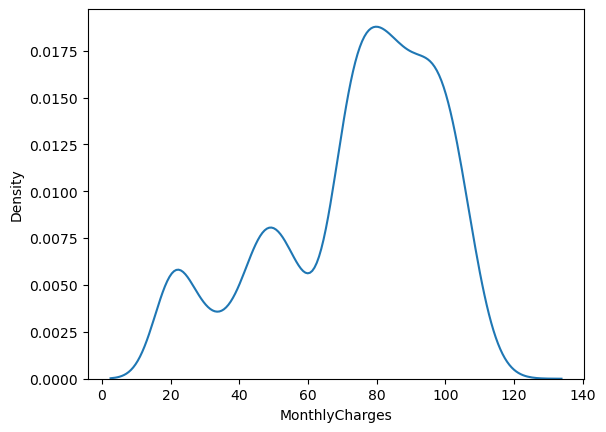

In [115]:
sns.kdeplot(df_churned)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

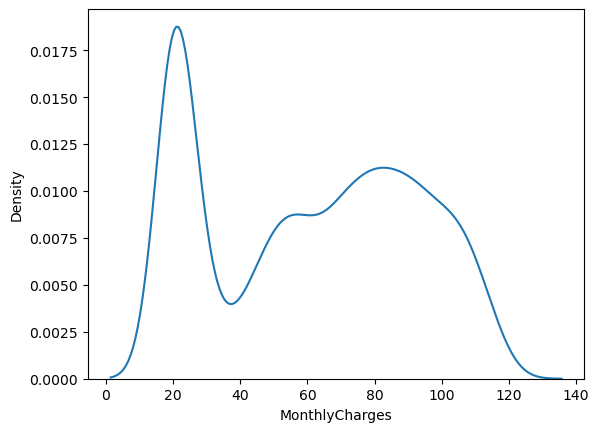

In [116]:
sns.kdeplot(df_not_churned)

Отчетливо видим, что распределения ненормальные. Попробуем привести к нормальному.

In [117]:
df_churned_log = np.log(df_churned)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

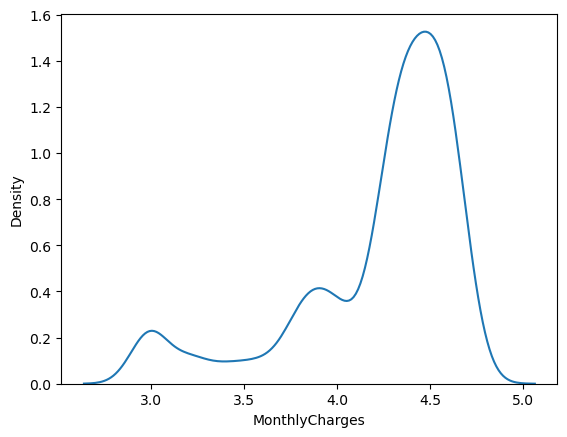

In [118]:
sns.kdeplot(df_churned_log)

Уже ближе, но видим, что распределение смещено вправо. На всякий случай проверим нормальность через тест Колмогорова-Смирнова, который не имеет ограничения на 5000 наблюдений, в отличие от Шапиро-Уилка.

In [119]:
stats.kstest(df_churned_log, 'norm')

KstestResult(statistic=0.9983403750006891, pvalue=0.0)

Так как p-value менее 0.05, то нулевую гипотезу о нормальности распределения мы отвергаем.

In [120]:
df_not_churned_log = np.log(df_not_churned)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

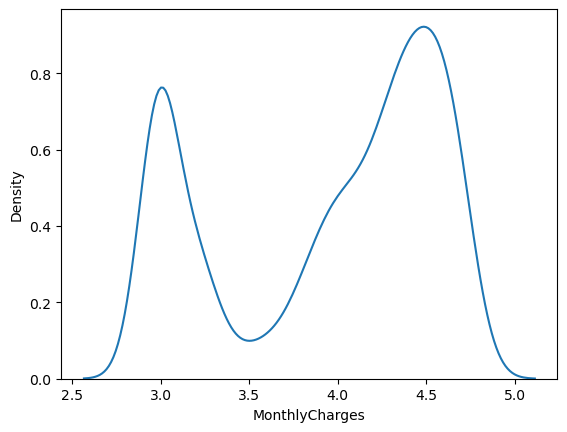

In [121]:
sns.kdeplot(df_not_churned_log)

In [122]:
stats.kstest(df_not_churned_log, 'norm')

KstestResult(statistic=0.9981588302708866, pvalue=0.0)

Аналогично получаем, что распределение не получилось привести к нормальному. Попробуем взять корень.

In [123]:
df_churned_sqrt = np.sqrt(df_churned)

In [124]:
stats.kstest(df_churned_sqrt, 'norm')

KstestResult(statistic=0.999992929444957, pvalue=0.0)

In [125]:
df_not_churned_sqrt = np.sqrt(df_not_churned)

In [126]:
stats.kstest(df_not_churned_sqrt, 'norm')

KstestResult(statistic=0.999990313702539, pvalue=0.0)

Квадратный корень тоже не помог. Попробуем кубический.

In [127]:
df_churned_sqrt3 = df_churned**(1./3.)

In [128]:
stats.kstest(df_churned_sqrt3, 'norm')

KstestResult(statistic=0.9961087264111014, pvalue=0.0)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

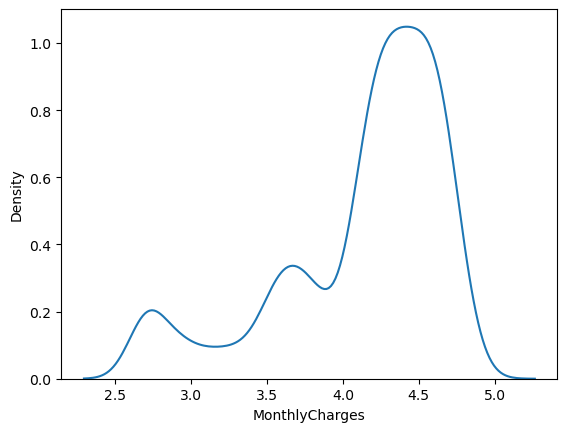

In [129]:
sns.kdeplot(df_churned_sqrt3)

In [130]:
df_not_churned_sqrt3 = df_not_churned**(1./3.)

In [131]:
stats.kstest(df_not_churned_sqrt3, 'norm')

KstestResult(statistic=0.9957660233865501, pvalue=0.0)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

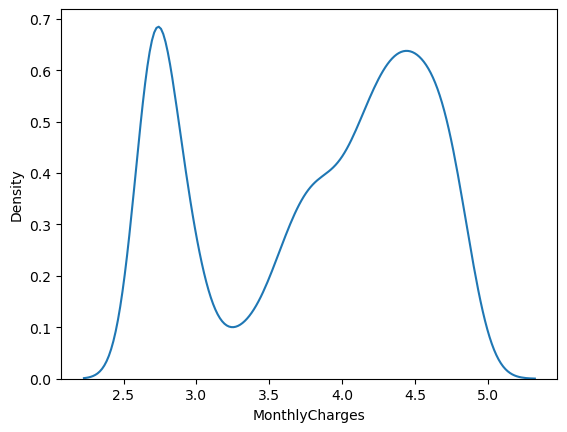

In [132]:
sns.kdeplot(df_not_churned_sqrt3)

Таким образом, у нас не получилось привести распределения к нормальному. Поэтому снова будем использовать критерий Манна-Уитни.

In [133]:
stats.mannwhitneyu(df_churned, df_not_churned)

MannwhitneyuResult(statistic=5853402.5, pvalue=3.611153460064124e-49)

In [134]:
MU_pval = stats.mannwhitneyu(df_churned, df_not_churned)[1]

In [135]:
alpha = 0.05

In [136]:
if MU_pval < alpha:
    print("Вывод: отвергаем H0 (связь есть)")
else:
    print("Вывод: не отвергаем H0 (связи нет или стат. не значима)")
    

Вывод: отвергаем H0 (связь есть)


<b>Итого, получили, что зависимость между ежемесячной суммой платежа и оттоком есть, что мы также выше видели на графике.</b>

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>7. РЕШЕНИЕ ЗАДАЧИ КЛАССИФИКАЦИИ, часть 1</b></font>
    </div>

<font color='#61189A' size = "4"><b>Logistic Regression Model</b></font>

Наконец, возвращаемся к цели исследования - прогноз оттока. <br>
Решать задачу классификации оттока предлагается с помощью методов машинного обучения. <br>
Первой рассмотрим модель логистической регрессии, решающую эту задачу.

Для начала нам необходимо подготовить датасет, для этого оставшиеся категориальные переменные мы переведем в бинарный вид с помощью подхода One Hot Encoding (OHE), метод get_dummies.

In [137]:
df2.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95       1889.50   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

In [138]:
InternetService = pd.get_dummies(df2['InternetService'], prefix='IS')
Contract = pd.get_dummies(df2['Contract'], prefix='C')
PaymentMethod = pd.get_dummies(df2['PaymentMethod'], prefix = 'PM' )

In [139]:
InternetService

IS_DSL  IS_Fiber optic  IS_No
0          1               0      0
1          1               0      0
2          1               0      0
3          1               0      0
4          0               1      0
...      ...             ...    ...
7027       1               0      0
7028       0               1      0
7029       1               0      0
7030       0               1      0
7031       0               1      0

[7005 rows x 3 columns]

In [140]:
Contract

C_Month-to-month  C_One year  C_Two year
0                    1           0           0
1                    0           1           0
2                    1           0           0
3                    0           1           0
4                    1           0           0
...                ...         ...         ...
7027                 0           1           0
7028                 0           1           0
7029                 1           0           0
7030                 1           0           0
7031                 0           0           1

[7005 rows x 3 columns]

In [141]:
PaymentMethod

PM_Bank transfer (automatic)  PM_Credit card (automatic)  \
0                                0                           0   
1                                0                           0   
2                                0                           0   
3                                1                           0   
4                                0                           0   
...                            ...                         ...   
7027                             0                           0   
7028                             0                           1   
7029                             0                           0   
7030                             0                           0   
7031                             1                           0   

      PM_Electronic check  PM_Mailed check  
0                       1                0  
1                       0                1  
2                       0                1  
3                       0                0  
4                       1                0  
...                   ...              ...  
7027                    0                1  
7028                    0                0  
7029                    1                0  
7030                    0                1  
7031                    0                0  

[7005 rows x 4 columns]

Также выше мы уже преобразовывали признаки доп. услуг в бинарные, а затем создавали новую переменную, отвечающую за наличие хотя бы 1 доп. услуги у клиента. Более того, проверка гипотез показала стат. значимую зависимость между данной переменной и целевой.<br>

Собираем по кусочкам массив предикторов:

In [142]:
bin_num_features = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [143]:
df_x = pd.concat([df2.loc[:,bin_num_features], InternetService, Contract, PaymentMethod, df3.loc[:, 'Services']], axis=1)

In [144]:
df_x.head()

SeniorCitizen  Partner  Dependents  PhoneService  PaperlessBilling  tenure  \
0              0        1           0             0                 1       1   
1              0        0           0             1                 0      34   
2              0        0           0             1                 1       2   
3              0        0           0             0                 0      45   
4              0        0           0             1                 1       2   

   MonthlyCharges  TotalCharges  IS_DSL  IS_Fiber optic  IS_No  \
0           29.85         29.85       1               0      0   
1           56.95       1889.50       1               0      0   
2           53.85        108.15       1               0      0   
3           42.30       1840.75       1               0      0   
4           70.70        151.65       0               1      0   

   C_Month-to-month  C_One year  C_Two year  PM_Bank transfer (automatic)  \
0                 1           0           0                             0   
1                 0           1           0                             0   
2                 1           0           0                             0   
3                 0           1           0                             1   
4                 1           0           0                             0   

   PM_Credit card (automatic)  PM_Electronic check  PM_Mailed check  Services  
0                           0                    1                0         1  
1                           0                    0                1         1  
2                           0                    0                1         1  
3                           0                    0                0         1  
4                           0                    1                0         0

In [145]:
y = df2.Churn

Хотя и логистическая регрессия не выдвигает жестких требований к нормализации в отличие от алгоритмов, основанных на расстоянии (KNN, K-means, SVM), в <a href = 'https://scikit-learn.org/stable/modules/preprocessing.html'>документации</a> рекомендуется даже для лог. регрессии скалировать признаки, что мы и сделаем.

In [146]:
sc_x = StandardScaler()
x = sc_x.fit_transform(df_x) 

In [147]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [148]:
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)

LogisticRegression()

In [149]:
y_pred = log_clf.predict(x_test)

In [150]:
accuracy_score(y_test, y_pred)

0.8051391862955032

Наиболее корректным подходом к оценке качества модели является процесс кросс-валидации. В данном случае мы делим выборку не на 2 (тренировочную и тестовую), а на k-групп. Далее происходит k итераций, модель обучается на k-1 подмножествах и тестируется на оставшемся. На след итерации происходит смена.

In [151]:
scores = cross_val_score(log_clf,x,y,cv=3,scoring = 'accuracy')
print(scores)
scores.mean()

[0.80813704 0.8012848  0.80385439]


0.8044254104211278

На каждом фолде считается метрика accuracy, в качестве итоговой берется среднее. Как видно, мы получили более точную метрику - ниже (но незначительно), чем полученную на стандартном сплит-тестировании.

Далее посмотрим на матрицу ошибок:

In [152]:
cm = metrics.confusion_matrix(y_test, y_pred)

C:\Users\IsaevaYO\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



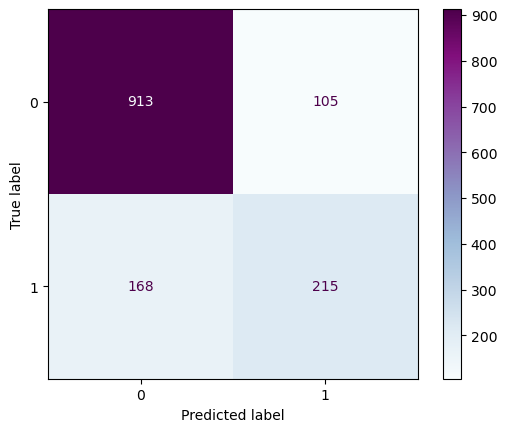

In [153]:
metrics.plot_confusion_matrix(log_clf, x_test, y_test, cmap='BuPu')

plt.show()

<AxesSubplot:>

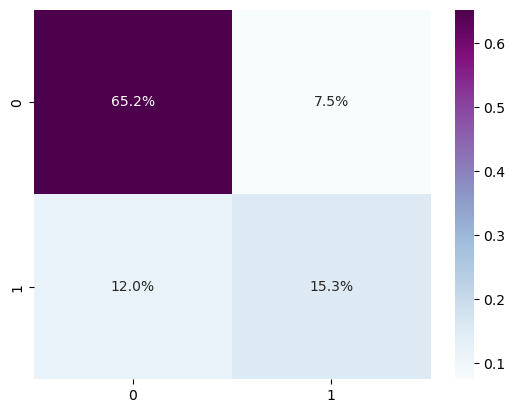

In [154]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.1%', cmap='BuPu')

Доля верно классифицированных клиентов, которые не ушли составляет 65% (TN). Доля верно классифицированных ушедших клиентов - 15.3% (TP). Для нас важен левый нижний квадрат False Negative 12% - клиенты, которые фактически ушли, а мы прогнозировали, что они останутся (т.е. потеря клиентов). 

Основной метрикой оценки качества модели считается F-мера, которая рассчитывается для каждого из классов (0/1):

In [155]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1018
           1       0.67      0.56      0.61       383

    accuracy                           0.81      1401
   macro avg       0.76      0.73      0.74      1401
weighted avg       0.80      0.81      0.80      1401



И здесь мы видим ключевую проблему: почему F-мера для класса 0 равна 0.87 (хороший показатель), а для класса 1 - 0.61 (плохой показатель)? Это произошло из-за проблемы несбалансированных классов, являющейся стандартной проблемой в реальных задачах классификации.

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>8. РЕШЕНИЕ ПРОБЛЕМЫ НЕСБАЛАНСИРОВАННЫХ КЛАССОВ</b></font>
    </div>

Почему так происходит? Алгоритм видит, что подавляющее большинство наблюдений - 0 класс. Поэтому он просто принимает решение всегда предсказывать 0 класс, чтобы получить высокую точность. 

Действительно, как мы уже увидели ранее (продублируем для наглядности еще раз), доля ушедших клиентов составляет лишь 26%.

<AxesSubplot:title={'center':'Доля ушедших и не ушедших клиентов'}, ylabel='Churn'>

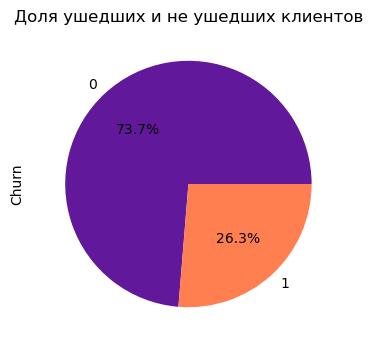

In [156]:
df2['Churn'].value_counts().plot(kind='pie', figsize = (7,4), colors = colors,
                                                   title = 'Доля ушедших и не ушедших клиентов', 
                                                   autopct = '%.1f%%')

Проблема несбалансированных классов ведет к проблеме переобучения, однако данную проблему сложно решить стандартным способом штрафования модели. Если использовать моделирование системы штрафов, то нужно использовать более сложные механизмы, учитывающие специфику разбалансировки. Рассмотрим на примере L2 регуляризации:

In [157]:
clf_log_L2 = LogisticRegression(C = 10, penalty= 'l2')

In [158]:
clf_log_L2.fit(x_train,y_train)
y_pred = clf_log_L2.predict(x_test)

In [159]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1018
           1       0.67      0.56      0.61       383

    accuracy                           0.80      1401
   macro avg       0.76      0.73      0.74      1401
weighted avg       0.80      0.80      0.80      1401



Как видим - проблема в разнице метрик по классам осталась. Поэтому для решения проблемы будем применять один из популярных на сегодня методов - создание синтетических данных. Ранее мы импортировали библиотеку SMOTE (Synthetic Minority Oversampling Technique), с которой будем работать.

Текущее распределение классов следующее:

In [160]:
y.value_counts()

0    5163
1    1842
Name: Churn, dtype: int64

In [161]:
smote = SMOTE(sampling_strategy = 0.8)

Так как идеально ровных классов 50/50 практически не бывает, установим коэф.

In [162]:
x_sm, y_sm = smote.fit_resample(x, y)

In [163]:
y_sm.value_counts()

0    5163
1    4130
Name: Churn, dtype: int64

Что мы получили? Алгоритм специальным образом создал искусственные данные класса 1, которые теперь балансируют класс 0. Важно отметить, что эти данные генерируются не просто дубликатами каких-то наблюдений, принадлежащих классу, а путем сочетания различных характеристик.

Обучим модель на новых данных.

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,random_state = 0, test_size = 0.2)
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
y_pred = log_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.7885960193652501

Мы видим, что точность модели на тестовых данных упала, что логично, так как выше мы имели дело с переобучением. Теперь проверим балансировку метрик.

In [165]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1017
           1       0.75      0.79      0.77       842

    accuracy                           0.79      1859
   macro avg       0.79      0.79      0.79      1859
weighted avg       0.79      0.79      0.79      1859



Отлично! Теперь разница между F-мерами для классов не такая существенная и близка к хорошему показателю точности.<br>
Для сравнения - лучшие работы в соревновании на Каггле получают F-меру для класса Churn (1) около 80% на более сложных моделях.

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>9. РЕШЕНИЕ ЗАДАЧИ КЛАССИФИКАЦИИ, продолжение</b></font>
    </div>

Теперь рассмотрим наиболее значимые признаки, посмотрев на коэф. лог. регрессии:

<AxesSubplot:>

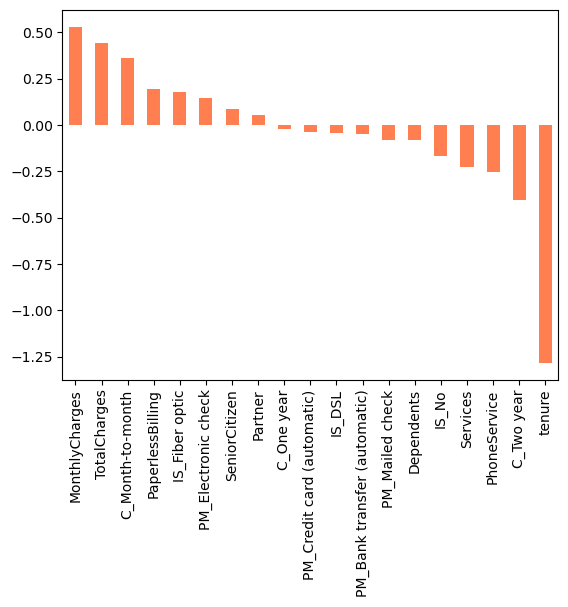

In [166]:
coefs = pd.Series(log_clf.coef_[0],
                 index=df_x.columns.values)
coefs.sort_values(ascending = False).plot(kind='bar', color = colors[1])

In [167]:
log_clf.coef_[0]

array([ 0.08903312,  0.05497994, -0.08018176, -0.25321886,  0.1963832 ,
       -1.28219584,  0.53091344,  0.44228725, -0.04272707,  0.17740706,
       -0.16427166,  0.36401845, -0.01925292, -0.4061592 , -0.04827745,
       -0.03699043,  0.14371491, -0.07787613, -0.22750752])

In [168]:
coefs = coefs.sort_values(ascending = False).to_frame().rename(columns={0: "log_coef"})

In [169]:
coefs['Odds'] = np.exp(coefs['log_coef'])
coefs

log_coef      Odds
MonthlyCharges                0.530913  1.700485
TotalCharges                  0.442287  1.556263
C_Month-to-month              0.364018  1.439101
PaperlessBilling              0.196383  1.216993
IS_Fiber optic                0.177407  1.194117
PM_Electronic check           0.143715  1.154555
SeniorCitizen                 0.089033  1.093117
Partner                       0.054980  1.056519
C_One year                   -0.019253  0.980931
PM_Credit card (automatic)   -0.036990  0.963685
IS_DSL                       -0.042727  0.958173
PM_Bank transfer (automatic) -0.048277  0.952869
PM_Mailed check              -0.077876  0.925079
Dependents                   -0.080182  0.922949
IS_No                        -0.164272  0.848511
Services                     -0.227508  0.796516
PhoneService                 -0.253219  0.776298
C_Two year                   -0.406159  0.666204
tenure                       -1.282196  0.277427

Интерпретируем коэффициенты:

Например, увеличение ежемесячных расходов (MonthlyCharges) на 1 увеличивает шанс оттока в 1.7<br>
А увеличение кол-ва месяцев клиента в компании (tenure) на 1 понижает шанс оттока почти в 4 раза.

Теперь попробуем добавить в модель отдельно факторы доп. услуг стримингового ТВ и фильмов.

In [170]:
df_x2 = df_x.copy()

In [171]:
df_x2['StreamingTV_bin'] = df2['StreamingTV'].replace({'Yes':1, 'No':0, 'No internet service':0})

In [172]:
df_x2['StreamingMovies_bin'] = df2['StreamingMovies'].replace({'Yes':1, 'No':0, 'No internet service':0})

In [173]:
df_x2.head()

SeniorCitizen  Partner  Dependents  PhoneService  PaperlessBilling  tenure  \
0              0        1           0             0                 1       1   
1              0        0           0             1                 0      34   
2              0        0           0             1                 1       2   
3              0        0           0             0                 0      45   
4              0        0           0             1                 1       2   

   MonthlyCharges  TotalCharges  IS_DSL  IS_Fiber optic  ...  \
0           29.85         29.85       1               0  ...   
1           56.95       1889.50       1               0  ...   
2           53.85        108.15       1               0  ...   
3           42.30       1840.75       1               0  ...   
4           70.70        151.65       0               1  ...   

   C_Month-to-month  C_One year  C_Two year  PM_Bank transfer (automatic)  \
0                 1           0           0                             0   
1                 0           1           0                             0   
2                 1           0           0                             0   
3                 0           1           0                             1   
4                 1           0           0                             0   

   PM_Credit card (automatic)  PM_Electronic check  PM_Mailed check  Services  \
0                           0                    1                0         1   
1                           0                    0                1         1   
2                           0                    0                1         1   
3                           0                    0                0         1   
4                           0                    1                0         0   

   StreamingTV_bin  StreamingMovies_bin  
0                0                    0  
1                0                    0  
2                0                    0  
3                0                    0  
4                0                    0  

[5 rows x 21 columns]

Заново обучим модель:

In [174]:
x = sc_x.fit_transform(df_x2) 
x_sm, y_sm = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,random_state = 0, test_size = 0.2)
log_clf = LogisticRegression()
log_clf.fit(x_train, y_train)
y_pred = log_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.778375470683163

In [175]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1017
           1       0.75      0.76      0.76       842

    accuracy                           0.78      1859
   macro avg       0.78      0.78      0.78      1859
weighted avg       0.78      0.78      0.78      1859



Результаты модели практически никак не изменились (при повторных запусках колеблятся +- в сотых), поэтому остановимся на массиве df_x2.<br>
Дополнительно посмотрим на ROC-кривую.

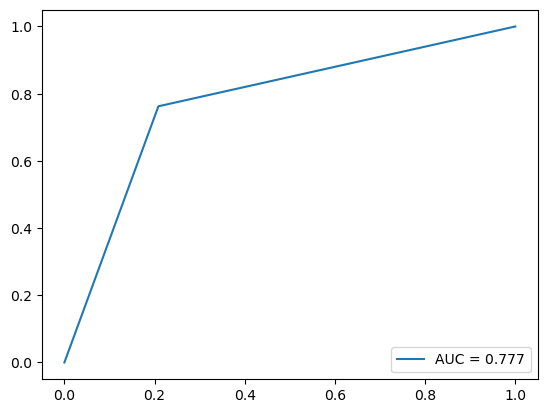

In [176]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC = "+str(round(auc,3)))
plt.legend(loc=4)
plt.show()

Итоговая метрика качества модели 78%, что является неплохим показалем в рамках решения данной задачи (бенчмарк: соревнование каггл).

<font color='#61189A' size = "4"><b>KNN Model</b></font>

In [177]:
x = sc_x.fit_transform(df_x2) 

In [178]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [179]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

In [180]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [181]:
y_pred = knn_clf.predict(x_test) 

C:\Users\IsaevaYO\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



In [182]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [183]:
accuracy_score(y_test, y_pred)

0.7715917201998572

In [184]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1018
           1       0.60      0.51      0.55       383

    accuracy                           0.77      1401
   macro avg       0.71      0.69      0.70      1401
weighted avg       0.76      0.77      0.77      1401



Аналогичным образом видим, что за красивой метрикой accuracy в 77% скрывается F-мера для 1 класса в 55%, что очень плохо. Снова воспользуемся SMOTE.

In [185]:
x_sm, y_sm = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,random_state = 0, test_size = 0.2)

In [186]:
knn_clf.fit(x_train, y_train)

KNeighborsClassifier()

In [187]:
y_pred = knn_clf.predict(x_test) 

In [188]:
accuracy_score(y_test, y_pred)

0.800968262506724

In [189]:
scores = cross_val_score(knn_clf,x_sm,y_sm,cv=3,scoring = 'accuracy')
scores.mean()

0.776285233792478

In [190]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81      1017
           1       0.76      0.82      0.79       842

    accuracy                           0.80      1859
   macro avg       0.80      0.80      0.80      1859
weighted avg       0.80      0.80      0.80      1859



KNN дала более высокие результаты (79% F-мера для 1 класса против 76% при лог. регрессии).

<font color='#61189A' size = "4"><b>RandomForest Model</b></font>

Для модели случайного леса подберем гиперпараметры с помощью цикла. Для каждого кол-ва листов будем считать accuracy и выберем максимальный скор.

In [191]:
RF_scores = []
for i in range(2,150):
    RF_clf = RandomForestClassifier(n_estimators = 42, random_state = 1, max_leaf_nodes=i)
    RF_clf.fit(x_train, y_train)
    y_pred = RF_clf.predict(x_test)
    RF_scores.append(metrics.accuracy_score(y_test, y_pred))

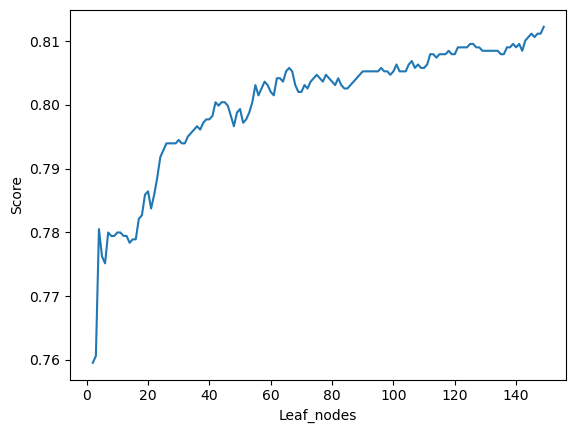

In [192]:
plt.plot(range(2,150), RF_scores)
plt.xlabel("Leaf_nodes")
plt.ylabel("Score")
plt.show()

In [193]:
print("The best RF score:  {:.2f}%".format(max(RF_scores)*100))

The best RF score:  81.23%


In [194]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1017
           1       0.78      0.82      0.80       842

    accuracy                           0.81      1859
   macro avg       0.81      0.81      0.81      1859
weighted avg       0.81      0.81      0.81      1859



Получили достаточно высокие метрики, выведем наиболее значимые факторы:

In [195]:
features_imp = RF_clf.feature_importances_

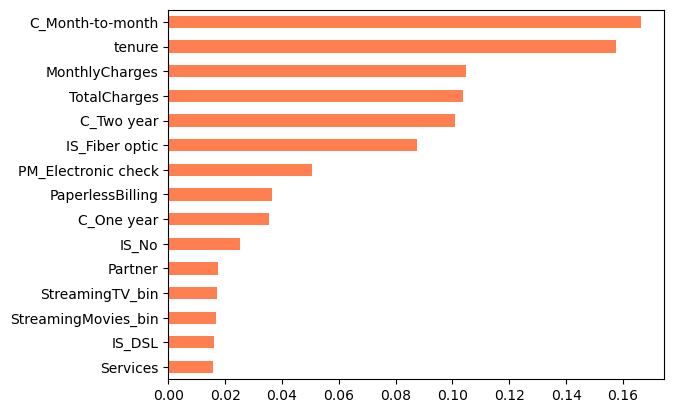

In [196]:
coefs = pd.Series(features_imp, index=df_x2.columns.values).sort_values()[-15:].plot(kind = 'barh', color = colors[1])

Таким образом, мы видим, что пока самой эффективной моделью является модель случайного леса. F-мера для класса 1 = 0.80.

<font color='#61189A' size = "4"><b>Catboost Model</b></font>

Рассмотрим модель CatBoost, которая была специально разработана для того, чтобы работать с категориальными признаками напрямую, без дополнительной кодировки в бинарные переменные. Для этого модели нужно однозначно сказать - какие переменные являются категориальными.

In [197]:
df2.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG  Female              0        1           0       1   
1  5575-GNVDE    Male              0        0           0      34   
2  3668-QPYBK    Male              0        0           0       2   
3  7795-CFOCW    Male              0        0           0      45   
4  9237-HQITU  Female              0        0           0       2   

   PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             0  No phone service             DSL             No  ...   
1             1                No             DSL            Yes  ...   
2             1                No             DSL            Yes  ...   
3             0  No phone service             DSL            Yes  ...   
4             1                No     Fiber optic             No  ...   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                1           Electronic check          29.85         29.85   
1                0               Mailed check          56.95       1889.50   
2                1               Mailed check          53.85        108.15   
3                0  Bank transfer (automatic)          42.30       1840.75   
4                1           Electronic check          70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  

[5 rows x 21 columns]

In [198]:
x = df2.drop(['customerID', 'Churn'], axis = 1)

In [199]:
x.dtypes.sort_values()

SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
PaperlessBilling      int64
TotalCharges        float64
MonthlyCharges      float64
PaymentMethod        object
Contract             object
StreamingMovies      object
StreamingTV          object
gender               object
DeviceProtection     object
OnlineSecurity       object
InternetService      object
MultipleLines        object
TechSupport          object
OnlineBackup         object
dtype: object

In [200]:
cat_features = list(x.dtypes.sort_values().iloc[8:].index)
print('Categorical features:', cat_features)

Categorical features: ['PaymentMethod', 'Contract', 'StreamingMovies', 'StreamingTV', 'gender', 'DeviceProtection', 'OnlineSecurity', 'InternetService', 'MultipleLines', 'TechSupport', 'OnlineBackup']


In [201]:
#x_sm, y_sm = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0, test_size = 0.2)

In [202]:
dataset_train = Pool(x_train, y_train, cat_features)

In [203]:
y.value_counts()

0    5163
1    1842
Name: Churn, dtype: int64

In [204]:
scale_pos_weight = 5163/1842

In [205]:
scale_pos_weight

2.8029315960912053

In [206]:
ctb_clf = CatBoostClassifier(scale_pos_weight=2.8)

ctb_clf.fit(dataset_train,
          verbose=50)

Learning rate set to 0.021505
0:	learn: 0.6843423	total: 183ms	remaining: 3m 2s
50:	learn: 0.5069857	total: 2.02s	remaining: 37.6s
100:	learn: 0.4745184	total: 3.86s	remaining: 34.4s
150:	learn: 0.4602618	total: 5.38s	remaining: 30.2s
200:	learn: 0.4522801	total: 7.17s	remaining: 28.5s
250:	learn: 0.4470639	total: 9.07s	remaining: 27.1s
300:	learn: 0.4409503	total: 11.1s	remaining: 25.7s
350:	learn: 0.4364159	total: 13.7s	remaining: 25.4s
400:	learn: 0.4313215	total: 15.4s	remaining: 23s
450:	learn: 0.4243578	total: 17.4s	remaining: 21.2s
500:	learn: 0.4178016	total: 19.5s	remaining: 19.4s
550:	learn: 0.4110600	total: 22s	remaining: 17.9s
600:	learn: 0.4036688	total: 24.6s	remaining: 16.4s
650:	learn: 0.3976471	total: 27.6s	remaining: 14.8s
700:	learn: 0.3922817	total: 30s	remaining: 12.8s
750:	learn: 0.3859179	total: 31.6s	remaining: 10.5s
800:	learn: 0.3796721	total: 33.4s	remaining: 8.29s
850:	learn: 0.3742286	total: 34.9s	remaining: 6.1s
900:	learn: 0.3687928	total: 36.4s	remaining

In [207]:
y_pred = ctb_clf.predict_proba(x_test)
y_pred

array([[0.29757983, 0.70242017],
       [0.45864354, 0.54135646],
       [0.92539674, 0.07460326],
       ...,
       [0.0940496 , 0.9059504 ],
       [0.98233814, 0.01766186],
       [0.25213637, 0.74786363]])

In [208]:
y_pred = ctb_clf.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [209]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.76      0.83      1018
           1       0.55      0.80      0.65       383

    accuracy                           0.77      1401
   macro avg       0.73      0.78      0.74      1401
weighted avg       0.81      0.77      0.78      1401



Как видим, модель не очень хорошо справляется c проблемой несбалансированных классов.

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>10. ИМПЛЕМЕНТАЦИЯ МОДЕЛЕЙ В МАРКЕТИНГОВУЮ СТРАТЕГИЮ</b></font>
    </div>

Теперь представим, что с помощью проведенного анализа и предиктивных моделей мы решаем давать скидку клиентам, которых мы прогнозируем как ушедших. Например, скидка 15%. Выскажем допущение, что при получении скидки клиент останется в компании с вероятностью 100% (далее этот параметр можно менять).<br>
Будем моделировать ситуацию на примере 1 месяца, то есть доход компании - это сумма MonthlyCharges.

Добавим в тестовый массив данные о фактическом оттоке и пронозируемом.

In [210]:
x_test['y_pred'] = y_pred

In [211]:
x_test['y_fact'] = y_test

In [212]:
x_test.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2855    Male              1        0           0      67             1   
1238  Female              0        1           0      21             0   
2889  Female              0        0           0      48             1   
6172    Male              0        1           1      61             1   
522   Female              0        0           0      23             1   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
2855               Yes     Fiber optic             No           No  ...   
1238  No phone service             DSL            Yes           No  ...   
2889                No             DSL            Yes           No  ...   
6172               Yes     Fiber optic             No           No  ...   
522                Yes     Fiber optic             No           No  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
2855          No         Yes             Yes  Month-to-month                1   
1238          No          No              No  Month-to-month                0   
2889         Yes          No              No        One year                1   
6172          No         Yes             Yes        One year                1   
522           No          No              No  Month-to-month                0   

                  PaymentMethod MonthlyCharges  TotalCharges  y_pred  y_fact  
2855    Credit card (automatic)         101.40       6841.05       1       0  
1238           Electronic check          28.50        629.35       1       0  
2889    Credit card (automatic)          60.35       2896.40       0       1  
6172           Electronic check          99.90       6241.35       1       0  
522   Bank transfer (automatic)          75.60       1758.60       1       1  

[5 rows x 21 columns]

In [213]:
x_test.groupby(['y_fact','y_pred'])['MonthlyCharges'].sum().to_frame()

MonthlyCharges
y_fact y_pred                
0      0             45103.05
       1             18007.10
1      0              4913.25
       1             23479.45

Теперь считаем:
<br>0-0 - это клиенты, которые не ушли и мы спрогнозировали, что они не уйдут. На них действие нашей маркетинговой кампании не распространяется.
<br>0-1 - это клиенты, которые не ушли, а мы предсказали, что они уйдут и дали им скидку (как бы зря). Выручка с них за месяц - это MonthlyCharges*0.85%
<br>1-0 - это клиенты, которые ушли, а мы предсказали, что они не уйдут. Этот доход мы теряем и без кампании, и в случае кампании.
<br>1-1 - это клиенты, которые ушли и мы предскаали что они уйдут. Затем дали им скидку 15% и они остались, т.е. сохранили доход с них.

Перейдем к расчетам:

In [214]:
discount = 0.15

In [215]:
probability_stay = 1

In [216]:
profit_without_strategy = 45103.05 + 18007.10

Это обычный доход компании с клиентов в следующем месяце по клиентам, которые не уйдут (y_fact = 0).

In [217]:
profit_with_strategy = 45103.05 + 18007.10*(1-discount)*probability_stay + 23479.45*(1-discount)*probability_stay

In [218]:
total_effect = profit_with_strategy - profit_without_strategy
total_effect

17256.46749999999

Таким образом, при условии введенных допущений, эффект от проведения такой маркетинговой компании, направленной на превентивную работу с оттоком? принесет компании дополнительный доход в размере 17256.5 в след. месяце.

<div style="background:#61189A; opacity: 0.6; padding: 5px">

<font color='#ffffff' size = "4"><b>11. ИТОГОВЫЕ ВЫВОДЫ</b></font>
    </div>

<div style = "font-size: 15px;">
 <ul>
    <li>Мужчины и женщины одинаково тратят на услуги телекоммуникационной компании (разница стат. незначима), более того, отток не зависит от пола клиента.</li>
    <li>Существует значимая связь между сроком контракта и оттоком клиентов. Модели показывают, что ежемесячный тип контракта является значимым фактором оттока (повышает вероятность оттока), и, напротив, наличие двухлетнего контракта у клиента снижает вероятность его оттока.</li>
    <li>Наличие у клиента дополнительных услуг в виде защиты устройства, резервного копирования, онлайн-безопасности и техподдержки значимо снижает вероятность оттока.</li>
    <li>Также есть статистически значимая зависимость между ежемесячной суммой платежа и оттоком, что также подтверждается предиктивной моделью (рост ежемесячных расходов увеличивает вероятность оттока).</li>
    <li>В работе были рассмотрены модели логистической регрессии, KNN, случайного леса и CatBoost, а также учтена ситуация несбалансированных классов. Наилучший результат показала модель случайного леса со следующими метриками: <b>accuracy - 81%, F-мера для 0 класса - 0.82, для 1 класса - 0.80.</b></li>
     <li>В итоге, наиболее значимыми факторами (с наибольшими весами) в модели случайного леса являются: кол-во месяцев клиента в компании (tenure), тип контракта (ежемесячный) - С_Month-to-month, итоговые расходы (TotalCharges), тип контракта (2-х летний) - С_Two year, ежемесячные расходы - MonthlyCharges, интернет-провайдер Fiber optic, способ оплаты в виде электронного чека (IS_Electronic check).</li>
   </ul>
</div>

Наконец, было смоделировано применение маркетинговой кампании на основе предиктивной аналитики оттока. При поставленных допущениях данная кампания показала эффективность - доп. прибыль в размере 17256.5 засчет клиентов, которых удалось сохранить.